# Data Analysis and Visualization for Earth Scientists

This material is mostly adapted from the class taught at Columbia by Ryan Abernathey: **An Introduction to Earth and Environmental Data Science**. It is used here under the [Creative Commons Attribution-ShareAlike 4.0 International (CC BY-SA 4.0)](https://creativecommons.org/licenses/by-sa/4.0/) license.

The main objecttive of this workshop is to expose attendees to the 3 pillars of Data Science that will help make sense of any Earth Science Data:
* Data Wrangling
* Data Analysis
* Data Visualization

# Intro to Google Colab

There are several IDEs used to interact with computer. In this workshop, we will be using Colab. It is very similar to [JupyterLab](https://jupyterlab.readthedocs.io) with the only difference that Colab is ran on Google's computer. JupyterLab and Colab contains a complete environment for interactive scientific computing which runs in your web browser. Jupyter is an open source python project that was started by scientists like yourselves who wanted a more effective way to interact with their computers.

Over the course of this workshop, you will gain experience and familiarity with Colab.

# All About Data

This workshop attempts to give a broad overview of Earth Science data formats, exchange protocols, and best practices.

## What is (are) data?

Ultimately, as we know, all digital data are just 1s and 0s. Each 1 or 0 value is called a _bit_.
Bits are usually grouped together in groups of 8 bits, called a _byte_.
A byte can represent $2^8$, or 256, distinct values.
We can choose to _encode_ and _organize_ the bytes in many different ways to represent different types of information.

### Data Encoding

Encoding is the way that we map raw bytes to meaningful values.

#### Numerical Data

The most straightforward way to interpret a byte is as an integer.

In [ ]:
value = 0b10101010  # 1 byte base-2 literal
value

170

However, many different numerial data types can be encoded as bytes.
The more bytes we use for each value, the more range or precision we get.

In [ ]:
import numpy as np
print(np.dtype('i2'), np.dtype('i2').itemsize, "bytes")
print(np.dtype('f8'), np.dtype('f8').itemsize, "bytes")
print(np.dtype('complex256'), np.dtype('complex256').itemsize, "bytes")

int16 2 bytes
float64 8 bytes
complex256 32 bytes


#### Text Data

We can also encode text as bytes.

The simplest encoding is [ASCII](https://en.wikipedia.org/wiki/ASCII) (American Standard Code for Information Interchange).
ASCII uses one byte per character and therefore the ASCII alphabet only contains 256 different characters.

<img src="https://upload.wikimedia.org/wikipedia/commons/c/cf/USASCII_code_chart.png" width="500px" />

As computers became more powerful, and the computing community grew beyond the US and Western Europe, a more inclusive character encoding standard called [Unicode](https://en.wikipedia.org/wiki/Unicode) took hold.
The most common encoding is [UTF-8](https://en.wikipedia.org/wiki/UTF-8).
UTF-8 uses four bytes per character.
This web page the the Jupyter Notebook it was generated from all use UTF-8 encoding.

Fun fact: emojis are UTF-8 characters.

In [ ]:
"😀".encode()

b'\xf0\x9f\x98\x80'

Single values will only take us so far.
To represent scientific data, we need to think about data _organization_.

### Tabular Data

A very common type of data is "tabular data".
We will discuss this more when we get to Pandas.
Tabular data consists of _rows_ and _columns_.
The columns usually have a name and a specific data type.
Each row is a distinct sample.

Here is an example of tabular data

| Name | Mass | Diameter |
| -- | -- | -- |
| Mercury | 0.330 $\times 10^{24}$ kg | 4879 km |  
| Venus | 4.87 $\times 10^{24}$ kg | 12,104 km |  
| Earth | 5.97 $\times 10^{24}$ kg | 12,756 km |

(Via https://nssdc.gsfc.nasa.gov/planetary/factsheet/)

The simplest and most common way to encode tabular data is in a text file as [CSV (comma-separated values)](https://en.wikipedia.org/wiki/Comma-separated_values).
CSV is readable by humans and computer programs.

For larger datasets, [Apache Parquet](https://parquet.apache.org/) is a good alternative.
Parquet files are not human readable, but they can be parsed by computers much more quickly and efficiently.
They also use compression to achieve a smaller file size compared to CSV.

Multiple related tabular datasets can be stored and queried in a [relational database](https://en.wikipedia.org/wiki/Relational_database).
Databases are very useful but beyond the scope of this workshop.

### Array Data

When we have numerical data that are organized into an N-dimensional rectangular grid of values, we are dealing with array data.

<img src="http://xarray.pydata.org/en/stable/_images/dataset-diagram.png" width="600px" />

(via http://xarray.pydata.org/en/stable/user-guide/data-structures.html)

In python, we work with Array data in Numpy and Xarray.

Array data can be stored in the following standard formats:

- [Hierarchical Data Format (HDF5)](https://en.wikipedia.org/wiki/Hierarchical_Data_Format) - Container for many arrays
- [Network Common Data Form (NetCDF)](https://www.unidata.ucar.edu/software/netcdf/) - Container for many arrays which conform to the [NetCDF data model](https://www.unidata.ucar.edu/software/netcdf/docs/netcdf_data_model.html)
- [Zarr](https://zarr.readthedocs.io/en/stable/) - New cloud-optimized format for array storage
- [TileDB Embedded](https://docs.tiledb.com/main/) - New cloud-optimized format for array storage


### "GIS" Data

A common term in Earth Data Analysis is "GIS": Geographical Information Systems.
The term GIS was [coined by the company ESRI](https://www.esri.com/en-us/what-is-gis/overview) and is most commonly associated with that company's software products like ArcGIS.
Are we doing "GIS" in this workshop? Hard to say for sure.
However, it is important to understand some of the common terminology from GIS as it relates to data.

#### Raster Data

From [ESRI's definition](https://desktop.arcgis.com/en/arcmap/10.3/manage-data/raster-and-images/what-is-raster-data.htm):

> In its simplest form, a raster consists of a matrix of cells (or pixels) organized into rows and columns (or a grid) where each cell contains a value representing information, such as temperature. Rasters are digital aerial photographs, imagery from satellites, digital pictures, or even scanned maps.

![raster data](https://desktop.arcgis.com/en/arcmap/10.3/manage-data/raster-and-images/GUID-6754AF39-CDE9-4F9D-8C3A-D59D93059BDD-web.png)

_(Image credit Environmental Systems Research Institute, Inc.)_

Raster data is thus similar to array data, but specialized to 2D images of the earth.
Raster data nearly always includes a [Coordinate Reference System](https://en.wikipedia.org/wiki/Spatial_reference_system) that allows one to translate the pixels of the image to specific geographic locations on Earth.

The most common format for Raster data is the [GeoTIFF](https://en.wikipedia.org/wiki/GeoTIFF) and its recent evolution, the [Cloud-optimized GeoTIFF (CoG)](https://www.cogeo.org/).
In Python, raster data is commonly read with [rasterio](https://rasterio.readthedocs.io/en/latest/). Rasterio integrates with Xarray via the [rioxarray package](https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html), allowing you to read geotiffs directly into Xarray.

#### Vector Data

From the [Data Carpentry vector data lesson](https://datacarpentry.org/organization-geospatial/02-intro-vector-data/):

> Vector data structures represent specific features on the Earth’s surface, and assign attributes to those features. Vectors are composed of discrete geometric locations (x, y values) known as vertices that define the shape of the spatial object. The organization of the vertices determines the type of vector that we are working with: point, line or polygon.

<img src="https://datacarpentry.org/organization-geospatial/fig/dc-spatial-vector/pnt_line_poly.png" width="500px" />

_(Image credit: National Ecological Observatory Network (NEON))_

There are many different file formats for vector data. One of the most common is the [ESRI shapefile](https://en.wikipedia.org/wiki/Shapefile).
However, others [have argued that shapefile is not a good format](http://switchfromshapefile.org/) and have promoted the use of other formats including:
- [GeoJSON](https://geojson.org/)
- [GeoPackage](https://www.geopackage.org/)
- [FlatGeoBuf](https://flatgeobuf.org/)

Vector data can be read in python using [Fiona](https://fiona.readthedocs.io/en/latest/#) and [GeoPandas](https://geopandas.org/en/stable/docs/user_guide/io.html).

### Unstructured Data

Data that does not fit one of the above paradigms is often called ["unstructured" data](https://en.wikipedia.org/wiki/Unstructured_data).
Unstructured data is often characterized by nested or hierarchical structures.

A common container for unstructured data is [JavaScript Object Notation (JSON)](https://www.json.org/json-en.html).
JSON can be read into a Python dictionary using the [json](https://docs.python.org/3/library/json.html) package from the Python standard library.

### Metadata

Metadata are "data about the data", for example:
- Who created the dataset?
- What is the license for the data?
- What is the appropriate scholarly reference for the data?
- What variables or fields are contained in the data?
- What geographical or temporal extent does the data cover?

Metadata should attempt to follow established conventions and encoding formats to permit search engines or other tools to automatically "crawl" data repositories in order to index and catalog the data contained therein.

In Earth and Environmental science, we are fortunate to have widespread robust practices around metdata.
For self-contained file formats like NetCDF, metadata can be embedded directly into the data files.
Common metadata conventions for NetCDF-style data include:

- [Climate and Forecast (CF) Conventions](https://cfconventions.org/) - Commonly used with NetCDF data
- [Attribute Convention for Data Discovery (ACDD)](https://wiki.esipfed.org/Attribute_Convention_for_Data_Discovery_1-3)

Other types of data may have other metadata conventions. [Schema.org](https://schema.org/) provides a very general framework for metadata.

## How do programs access data?

### Reproducibility and Manual Download Steps

To perform a reproducible scientific workflow, you cannot assume that the input data for your analysis are already present on the computer where the code is running.
Such code may work for you, but it won't work when you share it with others, unless they happen to have the exact same files in the same locations.

Instead, your code should aim to _explicitly acquire the data from the original data provider_ via a persistent identifier such as a DOI or stable URL.
Manual data download steps, in which the user must click on buttons on a website, save the files manually, and then move them to a specific location, are a significant barrier to reproducibility and open science.

Below we will explore some strategies for writing data analysis code that avoids manual download steps.


### Loading Data Directly Over the Network

A great way of loading data is to read it directly over the network into your program.
When you write code in this way, you avoid any reliance on the local filesystem and local path names.
This is particularly effective for smallish datasets (< 100 MB) that are quick to transfer.

#### HTTP streams

HTTP - HyperText Transfer Protocol - is the standard way that web pages and other data are transferred over the internet.
HTTP connections are typically established via URLs - Universal Resource Locators. A key point is that **URLs are the same from every computer**.

Data analysis applications can also get data over HTTP. For example, Pandas can directly open files from `http[s]://` URLs.
If you can find such a link to your dataset, you can pass it directly to Pandas.
However, sometimes it takes some sleuthing to find the right link.

As an example, let's consider the [USGS Earthquake Database](https://www.usgs.gov/programs/earthquake-hazards/lists-maps-and-statistics).

When we go to this site we see something like this:

<img src="https://drive.google.com/uc?export=view&id=1zDPWx2xnv9p0HZ0e9xpfceHiP_zS66-M" width="500px" />

Filter to a desired data and it gives you the "Download" button to export CSV, which we know pandas can read.
If we just click the "CSV" button, we download the file to our computer (not what we want).
Instead, _right click or CTRL-click the download link_ and select "Copy Link Address".


Pasting the results into our code editor gives us the desired URL. We can feed this directly to Pandas.

In [2]:
#download a physical copy and move to your colab folder to load
import pandas as pd
filename = " " #The name of the file you just uploaded
df = pd.read_csv(filename)
df.head()

In [1]:
#a better way to work with the data
import pandas as pd
url = " " #copy url from website
df = pd.read_csv(url)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: ' '

This code will work from any computer on the internet! 🎉

## Best practices for data sharing: FAIR

The acronym FAIR - Findable, Accessible, Interoperable, Reusable - has recently caught on as the gold standard for data sharing.
The [FAIR principles](https://www.force11.org/group/fairgroup/fairprinciples) are [growing rapidly](https://eos.org/editors-vox/enabling-findable-accessible-interoperable-and-reusable-data) in the geoscience community.

Here we repeat and discuss the FAIR principles (via https://www.force11.org/group/fairgroup/fairprinciples)

---


# Python Fundamentals
## Basic Variables: Numbers and String ##

In [ ]:
# comments are anything that comes after the "#" symbol
a = 1       # assign 1 to variable a
b = "hello" # assign "hello" to variable b

The following identifiers are used as reserved words, or keywords of the language, and cannot be used as ordinary identifiers. They must be spelled exactly as written here:

    False      class      finally    is         return
    None       continue   for        lambda     try
    True       def        from       nonlocal   while
    and        del        global     not        with
    as         elif       if         or         yield
    assert     else       import     pass
    break      except     in         raise
    
Additionally, the following a built in functions which are always available in your namespace once you open a Python interpreter

    abs() dict() help() min() setattr() all() dir() hex() next() slice() any()
    divmod() id() object() sorted() ascii() enumerate() input() oct() staticmethod()
    bin() eval() int() open() str() bool() exec() isinstance() ord() sum() bytearray()
    filter() issubclass() pow() super() bytes() float() iter() print() tuple()
    callable() format() len() property() type() chr() frozenset() list() range()
    vars() classmethod() getattr() locals() repr() zip() compile() globals() map()
    reversed() __import__() complex() hasattr() max() round() delattr() hash()
    memoryview() set()



In [ ]:
# how to we see our variables?
print(a)
print(b)
print(a,b)

1
hello
1 hello


All variables are objects. Every object has a type (class). To find out what type your variables are

In [ ]:
print(type(a))
print(type(b))

<class 'int'>
<class 'str'>


In [ ]:
# as a shortcut, iPython notebooks will automatically print whatever is on the last line
type(b)

str

In [ ]:
# we can check for the type of an object
print(type(a) is int)
print(type(a) is str)

True
False


Different objects attributes and methods, which can be accessed via the syntax ``variable.method``

IPython will autocomplete if you press ``<tab>`` to show you the methods available.

In [ ]:
# this returns the method itself
b.capitalize

<function str.capitalize()>

In [ ]:
# this calls the method
b.capitalize()
# there are lots of other methods
# use google to search for what you need

'Hello'

In [7]:
#Capitalize the first letter of each word and make the others lowercase
w = 'I LovE Data SCIenCE'


In [ ]:
# binary operations act differently on different types of objects
c = 'World'
print(b + c)
print(a + 2)
print(a + b) #why do we get an error for this?

helloWorld
3


TypeError: unsupported operand type(s) for +: 'int' and 'str'

## Math ##

Basic arithmetic and boolean logic is part of the core Python library.

In [ ]:
# addition / subtraction


-3

In [ ]:
# multiplication


50

In [ ]:
# division


0.5

In [ ]:
# note that it was automatically converted to a float
type()

float

In [9]:
# exponentiation


6

In [ ]:
# rounding
round()

1

In [ ]:
# built in complex number support
(1+2j) / (3-4j)

(-0.2+0.4j)

In [ ]:
# logic
True and True

True

In [ ]:
True and False

False

In [ ]:
True or True

True

In [ ]:
(not True) or (not False)

True

## Conditionals ##

The first step to programming. Plus an intro to Python syntax.

In [ ]:
x = 100
if x > 0:
    print('Positive Number')
elif x < 0:
    print('Negative Number')
else:
    print ('Zero!')

Positive Number


In [ ]:
# indentation is MANDATORY
# blocks are closed by indentation level
if x > 0:
    print('Positive Number')
    if x >= 100:
        print('Huge number!')

Positive Number
Huge number!


## More Flow Control ##

In [12]:
# make a loop that iteratively prints "NABG" and counts how many times
count = 0
while count < 10:


SyntaxError: incomplete input (ipython-input-266564034.py, line 3)

In [ ]:
# use range to print all the numbers from 0 to 5 (inclusive)
for i in range():


0
1
2
3
4


__Important point__: in Python, we always count from 0!

In [ ]:
##what if you want to print the even numbers between 20 and 40?



In [13]:
# what is range?
type(range)

type

In [ ]:
#this brings up "help"
range?

In [ ]:
# iterate over a list we make up
for pet in ['dog', 'cat', 'fish']:
    print(pet, len(pet))

dog 3
cat 3
fish 4


What is the thing in brackets?


## Lists ##
Lists are one of the core Python data structures.

In [ ]:
l = ['dog', 'cat', 'fish']
type(l)

list

In [ ]:
# list have lots of methods
l.sort()
l

['cat', 'dog', 'fish']

In [14]:
# we can convert a range to a list
r = list(range(5))
r

[0, 1, 2, 3, 4]

In [15]:
#print the last number from the list and the new list without that number
while r:
    p = r.pop()
    print('p:', p)
    print('r:', r)

p: 4
r: [0, 1, 2, 3]
p: 3
r: [0, 1, 2]
p: 2
r: [0, 1]
p: 1
r: [0]
p: 0
r: []


There are many different ways to interact with lists. Exploring them is part of the fun of Python.

__list.append(x)__ Add an item to the end of the list. Equivalent to a[len(a):] = [x].

__list.extend(L)__
Extend the list by appending all the items in the given list. Equivalent to a[len(a):] = L.

__list.insert(i, x)__ Insert an item at a given position. The first argument is the index of the element before which to insert, so a.insert(0, x) inserts at the front of the list, and a.insert(len(a), x) is equivalent to a.append(x).

__list.remove(x)__ Remove the first item from the list whose value is x. It is an error if there is no such item.

__list.pop([i])__ Remove the item at the given position in the list, and return it. If no index is specified, a.pop() removes and returns the last item in the list. (The square brackets around the i in the method signature denote that the parameter is optional, not that you should type square brackets at that position. You will see this notation frequently in the Python Library Reference.)

__list.clear()__ Remove all items from the list. Equivalent to del a[:].

__list.index(x)__ Return the index in the list of the first item whose value is x. It is an error if there is no such item.

__list.count(x)__ Return the number of times x appears in the list.

__list.sort()__ Sort the items of the list in place.

__list.reverse()__ Reverse the elements of the list in place.

__list.copy()__ Return a shallow copy of the list. Equivalent to a[:].


Don't assume you know how list operations work!

In [ ]:
# "add" the two lists
x = list(range(5))
y = list(range(10,15))
z =
z

[0, 1, 2, 3, 4, 10, 11, 12, 13, 14]

In [ ]:
# access items from a list
print('first', z[0])
print('last', z[-1])
print('first 3', z[:3])
print('last 3', z[-3:])
print('middle, skipping every other item', z[5:10:2])

first 0
last 14
first 3 [0, 1, 2]
last 3 [12, 13, 14]
middle, skipping every other item [10, 12, 14]


In terms of set notation, Python indexing is _left inclusive_, _right exclusive_. If you remember this, you will never go wrong.

In [ ]:
# that means we get an error from the following
N = len(z)
z[N]

IndexError: list index out of range

In [ ]:
# this index notation also applies to strings
name = 'Ryan Abernathey'
print(name[:4])

Ryan


In [ ]:
# you can also test for the presence of items in a list
5 in z

False

Lists are not meant for math! They don't have a datatype.

In [ ]:
z[4] = 'fish'
z

[0, 1, 2, 3, 'fish', 10, 11, 12, 13, 14]

Python is full of tricks for iterating and working with lists

In [ ]:
# a cool Python trick: list comprehension
squares = [ ] #output the squares of [0,1,2,3,4]
squares

[0, 1, 4, 9, 16]

In [ ]:
# iterate over two lists together uzing zip
for item1, item2 in zip(x,y):
    print('first:', item1, 'second:', item2)

first: 0 second: 10
first: 1 second: 11
first: 2 second: 12
first: 3 second: 13
first: 4 second: 14


## Other Data Structures ##

We are almost there. We have the building blocks we need to do basic programming. But Python has some other data structures we need to learn about.

## Tuples ##

Tuples are similar to lists, but they are _immutable_—they can't be extended or modified. What is the point of this? Generally speaking: to pack together inhomogeneous data. Tuples can then be unpacked and distributed by other parts of your code.

Tuples may seem confusing at first, but with time you will come to appreciate them.

In [ ]:
# tuples are created with parentheses, or just commas
a = ('Ryan', 33, True)
b = 'Takaya', 25, False
type(b)

tuple

In [ ]:
# can be indexed like arrays
print() # print the second item in a

33


In [ ]:
# and they can be unpacked
name, age, status = a

## Dictionaries ##

This is an extremely useful data structure. It maps __keys__ to __values__.

Dictionaries are unordered!

In [ ]:
# different ways to create dictionaries
d = {'name': 'Ryan', 'age': 33}
e = dict(name='Takaya', age=25)
e

{'name': 'Takaya', 'age': 25}

In [ ]:
# access a value
d['name']

'Ryan'

Square brackets ``[...]`` are Python for "get item" in many different contexts.

In [ ]:
# test for the presence of a key
print('age' in d)
print('height' in e)

True
False


In [ ]:
# try to access a non-existant key
d['height']

KeyError: 'height'

In [ ]:
# add a new key
d['height'] = (5,11) # a tuple
d

{'name': 'Ryan', 'age': 33, 'height': (5, 11)}

In [ ]:
# keys don't have to be strings
d[99] = 'ninety nine'
d

{'name': 'Ryan', 'age': 33, 'height': (5, 11), 99: 'ninety nine'}

In [ ]:
# iterate over keys
for k in d:
    print(k, d[k])

name Ryan
age 33
height (5, 11)
99 ninety nine


In [ ]:
# better way
### for key, val in d.iteritems()
for key, val in d.items():
    print(key, val)

name Ryan
age 33
height (5, 11)
99 ninety nine


---

# Numpy and Matplotlib

This section will introduce NumPy and Matplotlib.
These are two of the most fundamental parts of the scientific python "ecosystem".
Most everything else is built on top of them.


<img src="https://upload.wikimedia.org/wikipedia/commons/3/31/NumPy_logo_2020.svg" width="300px" />

**Numpy**: _The fundamental package for scientific computing with Python_

- Website: <https://numpy.org/>
- GitHub: <https://github.com/numpy/numpy>

<img src="https://matplotlib.org/_static/logo2_compressed.svg" width="300px" />

**Matlotlib**: _Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python._

- Website: <https://matplotlib.org/>
- GitHub: <https://github.com/matplotlib/matplotlib>

## Importing and Examining a New Package

This will be our first experience with _importing_ a package which is not part of the Python [standard library](https://docs.python.org/3/library/).

In [17]:
import numpy as np

What did we just do? We _imported_ a package. This brings new variables (mostly functions) into our interpreter. We access them as follows.

In [ ]:
# find out what's in numpy
dir(np)

['False_',
 'ScalarType',
 'True_',
 '_CopyMode',
 '_NoValue',
 '__NUMPY_SETUP__',
 '__all__',
 '__array_api_version__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__dir__',
 '__doc__',
 '__expired_attributes__',
 '__file__',
 '__former_attrs__',
 '__future_scalars__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__numpy_submodules__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_core',
 '_distributor_init',
 '_expired_attrs_2_0',
 '_get_promotion_state',
 '_globals',
 '_int_extended_msg',
 '_mat',
 '_msg',
 '_no_nep50_warning',
 '_pyinstaller_hooks_dir',
 '_pytesttester',
 '_set_promotion_state',
 '_specific_msg',
 '_type_info',
 '_typing',
 '_utils',
 'abs',
 'absolute',
 'acos',
 'acosh',
 'add',
 'all',
 'allclose',
 'amax',
 'amin',
 'angle',
 'any',
 'append',
 'apply_along_axis',
 'apply_over_axes',
 'arange',
 'arccos',
 'arccosh',
 'arcsin',
 'arcsinh',
 'arctan',
 'arctan2',
 'arctanh',
 'argmax',
 'argmin',
 'argpartition',
 'argsort',
 'argwhere',
 'a

In [ ]:
# find out what version we have
np.__version__

'1.21.1'

There is no way we could explicitly teach each of these functions. The numpy documentation is crucial!

https://numpy.org/doc/stable/reference/

## NDArrays

The core class is the numpy ndarray (n-dimensional array).

The main difference between a numpy array and a more general data container such as `list` are the following:
- Numpy arrays can have N dimensions (while lists, tuples, etc. only have 1)
- Numpy arrays hold values of the same datatype (e.g. `int`, `float`), while `lists` can contain anything.
- Numpy optimizes numerical operations on arrays. Numpy is _fast!_

In [18]:
# create an array from a list
a = np.array([9,0,2,1,0])

In [19]:
# find out the datatype
a.dtype

dtype('int64')

In [27]:
# find out the shape
a.shape

(5,)

In [ ]:
# what is the shape
type(a.shape)

tuple

In [ ]:
# another array with a different datatype and shape
b = np.array([[5,3,1,9],[9,2,3,0]], dtype=np.float64)

# check dtype and shape
b.dtype, b.shape

(dtype('float64'), (2, 4))

## Array Creation

There are lots of ways to create arrays.

In [28]:
# create some uniform arrays
c = np.zeros((9,9))
d = np.ones((3,6,3), dtype=np.complex128)
e = np.full((3,3), np.pi)
e = np.ones_like(c)
f = np.zeros_like(d)

In [31]:
np.ones_like?

`arange` works very similar to `range`, but it populates the array "eagerly" (i.e. immediately), rather than generating the values upon iteration.

In [ ]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

`arange` is left inclusive, right exclusive, just like `range`, but also works with floating-point numbers.

In [ ]:
#Create an array from 2 to 4 in 0.25 increments
np.arange()

array([2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75])

A frequent need is to generate an array of N numbers, evenly spaced between two values. That is what `linspace` is for.

In [ ]:
np.linspace(2,4,20)

array([2.        , 2.10526316, 2.21052632, 2.31578947, 2.42105263,
       2.52631579, 2.63157895, 2.73684211, 2.84210526, 2.94736842,
       3.05263158, 3.15789474, 3.26315789, 3.36842105, 3.47368421,
       3.57894737, 3.68421053, 3.78947368, 3.89473684, 4.        ])

In [ ]:
# log spaced
np.logspace(1,2,10)

array([ 10.        ,  12.91549665,  16.68100537,  21.5443469 ,
        27.82559402,  35.93813664,  46.41588834,  59.94842503,
        77.42636827, 100.        ])

Numpy also has some utilities for helping us generate multi-dimensional arrays.
`meshgrid` creates 2D arrays out of a combination of 1D arrays.

In [ ]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.linspace(-np.pi, np.pi, 50)
xx, yy = np.meshgrid(x, y)
xx.shape, yy.shape

((50, 100), (50, 100))

## Indexing

Basic indexing is similar to lists

In [ ]:
# get some individual elements of xx
xx[0,0], xx[-1,-1], xx[3,-5]

(-6.283185307179586, 6.283185307179586, 5.775453161144872)

In [ ]:
# get some whole rows and columns
xx[0].shape, xx[:,-1].shape

((100,), (50,))

In [ ]:
# get some ranges
xx[3:10,30:40].shape

(7, 10)

There are many advanced ways to index arrays. You can [read about them](https://numpy.org/doc/stable/reference/arrays.indexing.html) in the manual. Here is one example.

In [ ]:
# use a boolean array as an index
idx = xx<0
yy[idx].shape

(2500,)

In [ ]:
# the array got flattened
xx.ravel().shape

(5000,)

## Visualizing Arrays with Matplotlib

It can be hard to work with big arrays without actually seeing anything with our eyes!
We will now bring in Matplotib to start visualizating these arrays.
For now we will just skim the surface of Matplotlib.
Much more depth will be provided in the next chapter.

In [ ]:
from matplotlib import pyplot as plt
###alternatively
##import matplotlib.pyplot as plt

For plotting a 1D array as a line, we use the `plot` command.

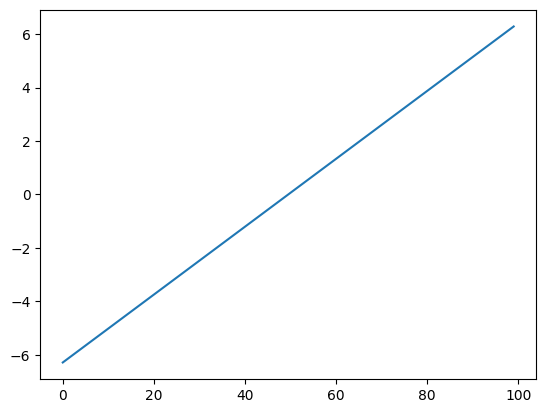

In [ ]:
plt.plot(x)

There are many ways to visualize 2D data.
He we use `pcolormesh`.

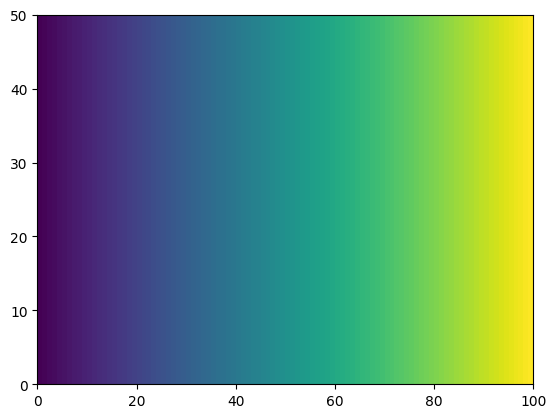

In [ ]:
plt.pcolormesh(xx)

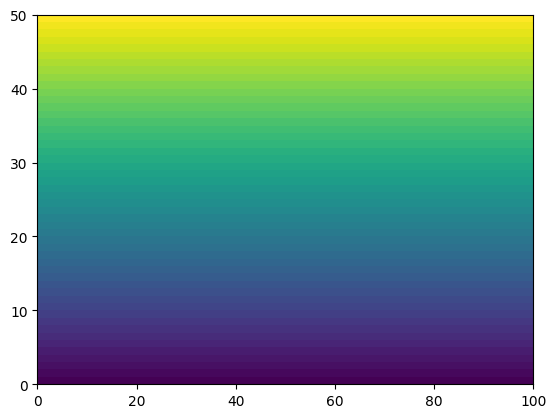

In [ ]:
plt.pcolormesh(yy)

## Array Operations ##

There are a huge number of operations available on arrays. All the familiar arithemtic operators are applied on an element-by-element basis.

### Basic Math

In [ ]:
f = np.sin(xx) * np.cos(0.5*yy)

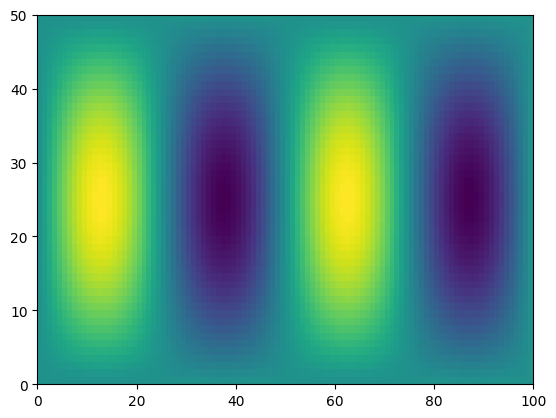

In [ ]:
plt.pcolormesh(f)

## Manipulating array dimensions ##

Swapping the dimension order is accomplished by calling `transpose`.

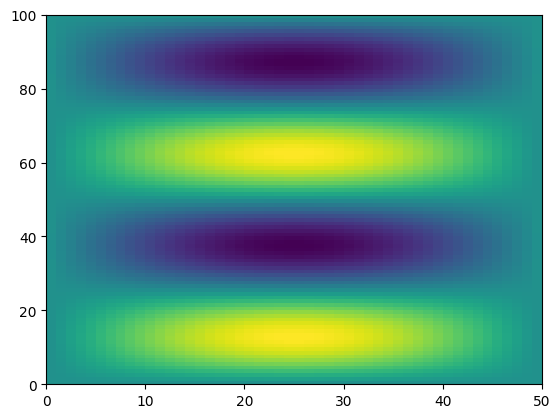

In [ ]:
f_transposed = f.transpose()
plt.pcolormesh(f_transposed)

We can also manually change the shape of an array...as long as the new shape has the same number of elements.

In [ ]:
g = np.reshape(f, (8,9))

ValueError: cannot reshape array of size 5000 into shape (8,9)

However, be careful with reshaping data!
You can accidentally lose the structure of the data.

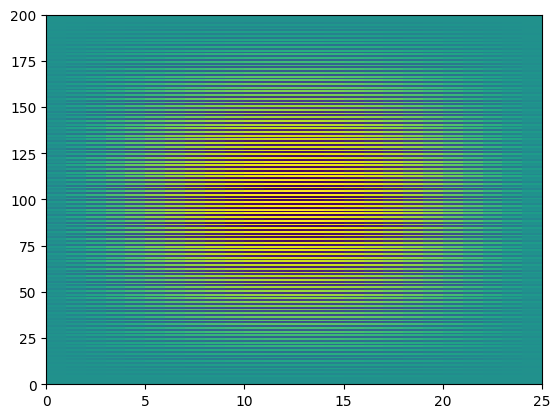

In [ ]:
g = np.reshape(f, (200,25))
plt.pcolormesh(g)

We can also "tile" an array to repeat it many times.

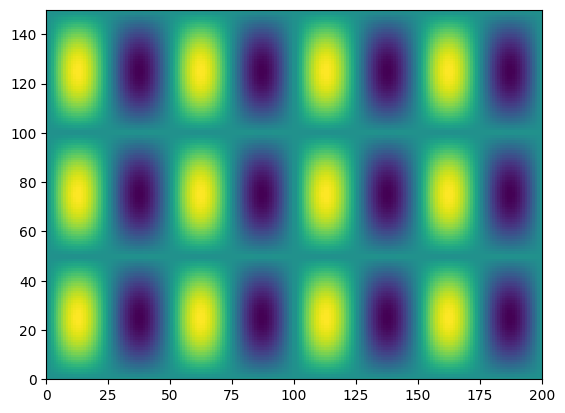

In [ ]:
f_tiled = np.tile(f,(3, 2))
plt.pcolormesh(f_tiled)

Another common need is to add an extra dimension to an array.
This can be accomplished via indexing with `None`.

In [ ]:
x.shape

(100,)

In [ ]:
x[None, :].shape

(1, 100)

In [ ]:
x[None, :, None, None].shape

(1, 100, 1, 1)

## Broadcasting


Not all the arrays we want to work with will have the same size.
One approach would be to manually "expand" our arrays to all be the same size, e.g. using `tile`.
_Broadcasting_ is a more efficient way to multiply arrays of different sizes
Numpy has specific rules for how broadcasting works.
These can be confusing but are worth learning if you plan to work with Numpy data a lot.

The core concept of broadcasting is telling Numpy which dimensions are supposed to line up with each other.

<img src="http://scipy-lectures.github.io/_images/numpy_broadcasting.png" width="720px" />

Dimensions are automatically aligned _starting with the last dimension_.
If the last two dimensions have the same length, then the two arrays can be broadcast.

In [ ]:
print(f.shape, x.shape)
g = f * x
print(g.shape)

(50, 100) (100,)
(50, 100)


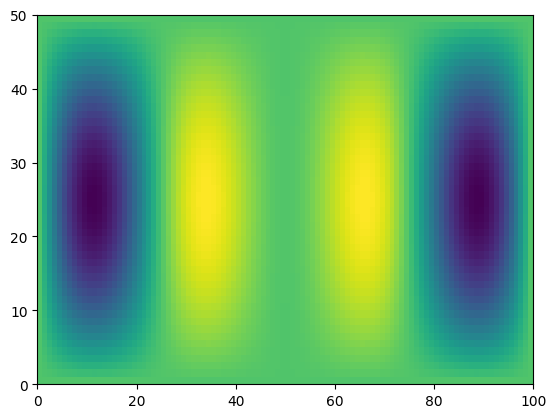

In [ ]:
plt.pcolormesh(g)

However, if the last two dimensions are _not_ the same, Numpy cannot just automatically figure it out.

In [ ]:
# multiply f by y
print(f.shape, y.shape)
h = f * y

(50, 100) (50,)


ValueError: operands could not be broadcast together with shapes (50,100) (50,) 

We can help numpy by adding an extra dimension to `y` at the end.
Then the length-50 dimensions will line up.

In [ ]:
print(f.shape, y[:, None].shape)
h = f * y[:, None]
print(h.shape)

(50, 100) (50, 1)
(50, 100)


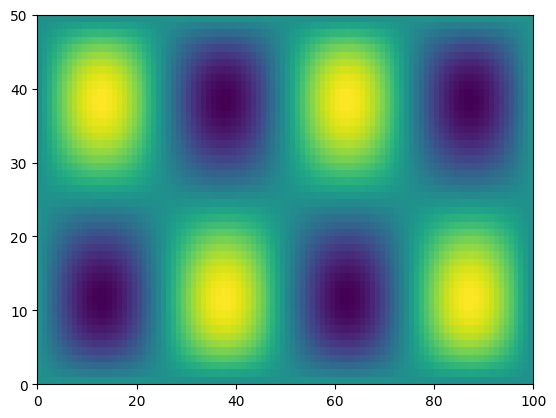

In [ ]:
plt.pcolormesh(h)

## Reduction Operations

In scientific data analysis, we usually start with a lot of data and want to reduce it down in order to make plots of summary tables.
Operations that reduce the size of numpy arrays are called "reductions".
There are many different reduction operations. Here we will look at some of the most common ones.

In [ ]:
# sum
g.sum()

np.float64(-3083.038387807155)

In [ ]:
# mean
g.mean()

np.float64(-0.616607677561431)

In [ ]:
# standard deviation
g.std()

np.float64(1.6402280119141424)

A key property of numpy reductions is the ability to operate on just one axis.

In [ ]:
# apply on just one axis
g_ymean = g.mean(axis=0)
g_xmean = g.mean(axis=1)

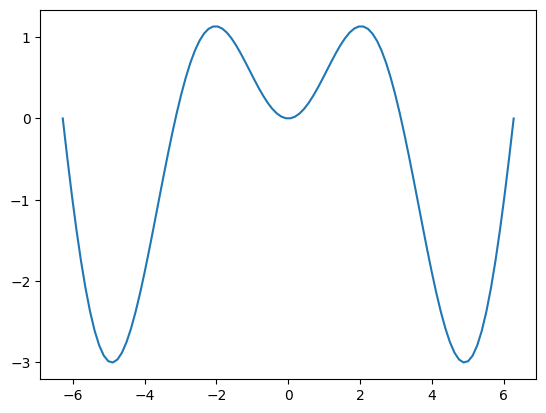

In [ ]:
plt.plot(x, g_ymean)

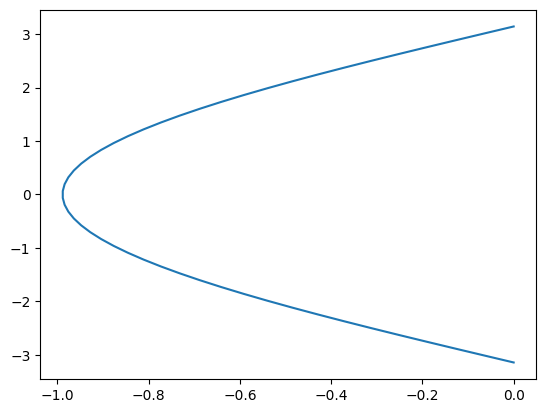

In [ ]:
plt.plot(g_xmean, y)

## Data Files

It can be useful to save numpy data into files.

In [ ]:
np.save('g.npy', g)

```{warning}
Numpy `.npy` files are a convenient way to store temporary data, but they are not considered a robust archival format.
NetCDF is the recommended way to store earth science data.
```

In [ ]:
# g_loaded = np.load('g.npy')

# np.testing.assert_equal(g, g_loaded)

## Exercise: Analyze [ARGO](http://www.argo.ucsd.edu) Data

The goal of this exercise is to gain comfort creating, visualizating, and computing with numpy array.

In this problem, we use real data from ocean profiling floats.
ARGO floats are autonomous robotic instruments that collect Temperature, Salinity, and Pressure data from the ocean. ARGO floats collect one "profile" (a set of messurements at different depths or "levels").

<img src="https://argo.ucsd.edu/wp-content/uploads/sites/361/2020/06/float_cycle_1.png" width="80%" />

Each profile has a single latitude, longitude, and date associated with it, in addition to many different levels.

Let's start by retrieving the data from NOAA.

In [ ]:
import urllib.request
url ='https://www.ncei.noaa.gov/data/oceans/argo/gadr/data/coriolis/4901412/nodc_4901412_prof.nc'
local_filename = "data.nc"
urllib.request.urlretrieve(url, local_filename)

('data.nc', <http.client.HTTPMessage at 0x7f11ea672f30>)

In [ ]:
from scipy.io import netcdf_file
ds = netcdf_file(local_filename,'r')

# ds.close()

In [ ]:
ds.variables.keys()

dict_keys(['data_type', 'format_version', 'handbook_version', 'reference_date_time', 'date_creation', 'date_update', 'platform_number', 'project_name', 'pi_name', 'station_parameters', 'cycle_number', 'direction', 'data_centre', 'dc_reference', 'data_state_indicator', 'data_mode', 'platform_type', 'float_serial_no', 'firmware_version', 'wmo_inst_type', 'juld', 'juld_qc', 'juld_location', 'latitude', 'longitude', 'position_qc', 'positioning_system', 'profile_pres_qc', 'profile_temp_qc', 'profile_psal_qc', 'vertical_sampling_scheme', 'config_mission_number', 'pres', 'pres_qc', 'pres_adjusted', 'pres_adjusted_qc', 'pres_adjusted_error', 'temp', 'temp_qc', 'temp_adjusted', 'temp_adjusted_qc', 'temp_adjusted_error', 'psal', 'psal_qc', 'psal_adjusted', 'psal_adjusted_qc', 'psal_adjusted_error', 'parameter', 'scientific_calib_equation', 'scientific_calib_coefficient', 'scientific_calib_comment', 'scientific_calib_date', 'history_institution', 'history_step', 'history_software', 'history_softw

### 2.1 Load each data file as a numpy array.

You can use whatever names you want for your arrays, but I recommend

`T`: temperature

`S`: salinity

`P`: pressure

`date`: date

`lat`: latitude

`lon`: longitude

`level`: depth level

**Note**: you have to actually look at the file name (the items in `files`) to know which files corresponds to which variable.


In [ ]:
T = ds.variables['temp'][:]
S = ds.variables['psal'][:]
P = ds.variables['pres'][:]
date = ds.variables['juld'][:]
lat = ds.variables['latitude'][:]
lon = ds.variables['longitude'][:]
level = np.arange(78)

### 2.2 Examine the shapes of T, S and P compared to `lon`, `lat`, `date` and `level`. How do you think they are related?

Based on the shapes, which dimensions do you think are shared among the arrays?

In [ ]:
level.shape

(78,)

In [ ]:
P.shape

(75, 78)

### 2.3 Make a plot for T, S and P (three plots) at the 59th level.

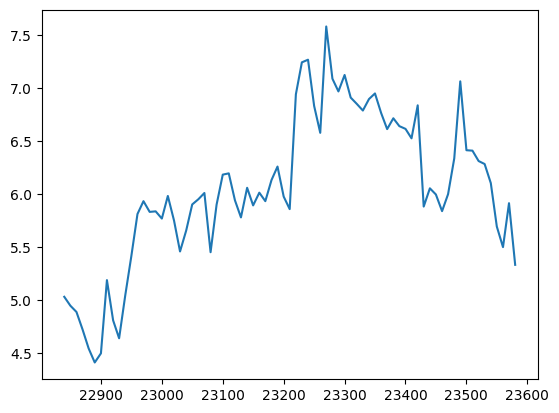

In [ ]:
# for i in range(P.shape[0]):
#     plt.plot(P[i], level)
plt.plot(date, T[:,58])

### 2.4 Compute the mean and standard deviation of each of T, S and P at each depth in `level`.

In [ ]:
T.mean(axis=0)

array([1.73597870e+01, 1.77302437e+01, 1.72379742e+01, 1.71503448e+01,
       1.69859905e+01, 1.67795467e+01, 1.65173321e+01, 1.62041626e+01,
       1.59587145e+01, 1.58310661e+01, 1.54494791e+01, 1.52545719e+01,
       1.50576477e+01, 1.49232092e+01, 1.47914400e+01, 1.47029018e+01,
       1.46222916e+01, 1.45487337e+01, 1.44726429e+01, 1.43905487e+01,
       1.43040133e+01, 1.42267723e+01, 1.41627216e+01, 1.40807295e+01,
       1.40015850e+01, 1.39266682e+01, 1.38562155e+01, 1.37942495e+01,
       1.37244682e+01, 1.36482944e+01, 1.35778923e+01, 1.35157061e+01,
       1.34416924e+01, 1.33612785e+01, 1.32869081e+01, 1.32153578e+01,
       1.31477346e+01, 1.30753479e+01, 1.30055466e+01, 1.29276276e+01,
       1.27207766e+01, 1.25089054e+01, 1.22987061e+01, 1.20549345e+01,
       1.18229218e+01, 1.09797201e+01, 1.08043060e+01, 1.04970274e+01,
       1.01749077e+01, 9.83453083e+00, 9.48625278e+00, 9.19793320e+00,
       8.66010761e+00, 8.12323856e+00, 7.60221434e+00, 7.15289450e+00,
      

In [ ]:
T.std(axis=0)

array([3.5219784e+00, 5.0938849e+00, 3.4388509e+00, 3.3670840e+00,
       3.2518461e+00, 3.0992341e+00, 2.9088466e+00, 2.7331994e+00,
       2.5704441e+00, 2.5256710e+00, 2.1926029e+00, 2.0719194e+00,
       1.9645181e+00, 1.9071960e+00, 1.8494020e+00, 1.8234805e+00,
       1.8074859e+00, 1.7912925e+00, 1.7721268e+00, 1.7599541e+00,
       1.7448198e+00, 1.7346112e+00, 1.7276155e+00, 1.7135897e+00,
       1.7000543e+00, 1.6905789e+00, 1.6815118e+00, 1.6745110e+00,
       1.6688495e+00, 1.6642740e+00, 1.6574529e+00, 1.6493602e+00,
       1.6399881e+00, 1.6351246e+00, 1.6255183e+00, 1.6189834e+00,
       1.6151636e+00, 1.6092724e+00, 1.6065261e+00, 1.5993446e+00,
       1.5802611e+00, 1.5639808e+00, 1.5486684e+00, 1.5364360e+00,
       1.5432454e+00, 1.5347110e+00, 8.4204227e-01, 9.0031958e-01,
       9.4661516e-01, 9.9022543e-01, 1.0178643e+00, 1.0169077e+00,
       1.0194427e+00, 9.7987765e-01, 9.4359875e-01, 8.8207746e-01,
       8.2934499e-01, 7.8592622e-01, 7.1755916e-01, 6.8351191e

### 2.7 Create a scatter plot of the `lon`, `lat` positions of the ARGO float.

Use the [plt.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) function.

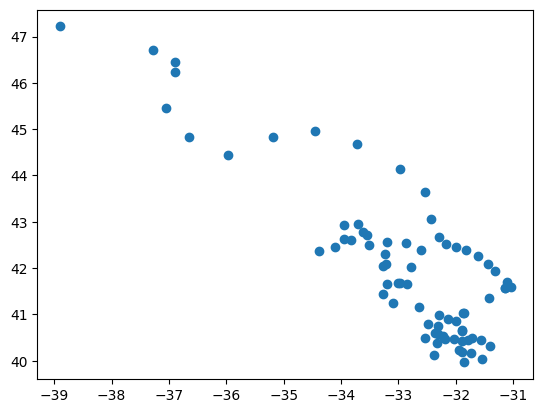

In [ ]:
plt.scatter(lon, lat)

---

# More Matplotlib

Matplotlib is the dominant plotting / visualization package in python. It is important to learn to use it well. In the last section, we saw some basic examples in the context of learning numpy. This section, we dive much deeper. The goal is to understand how matplotlib represents figures internally.

In [35]:
from matplotlib import pyplot as plt
%matplotlib inline

## Figure and Axes

The *figure* is the highest level of organization of matplotlib objects. If we want, we can create a figure explicitly.

In [ ]:
fig = plt.figure()

In [ ]:
fig = plt.figure(figsize=(13, 5))

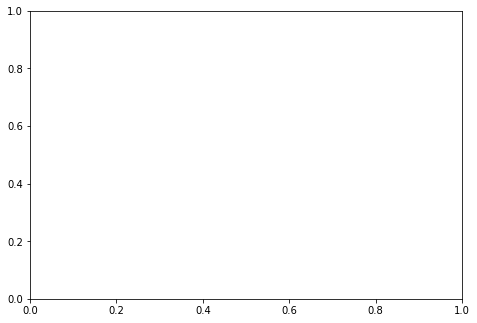

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

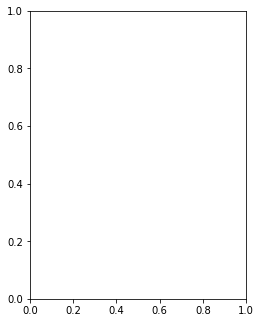

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 0.5, 1])

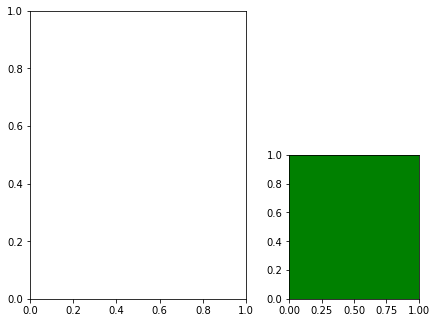

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 0.5, 1])
ax2 = fig.add_axes([0.6, 0, 0.3, 0.5], facecolor='g')

### Subplots

Subplot syntax is one way to specify the creation of multiple axes.

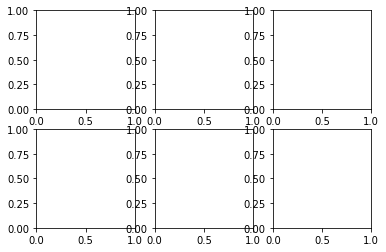

In [ ]:
fig = plt.figure()
axes = fig.subplots(nrows=2, ncols=3)

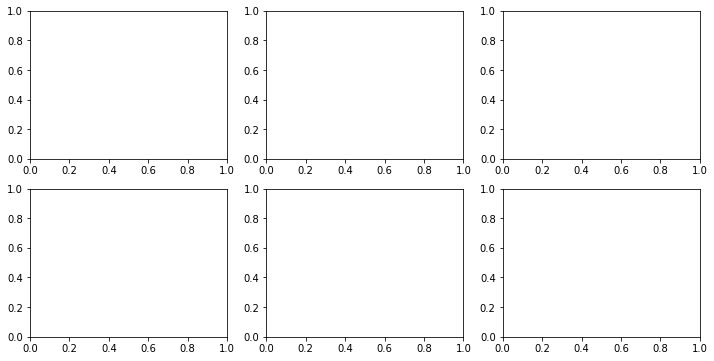

In [ ]:
fig = plt.figure(figsize=(12, 6))
axes = fig.subplots(nrows=2, ncols=3)

In [ ]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a1972b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a310da0>]], dtype=object)

There is a shorthand for doing this all at once.

__This is our recommended way to create new figures!__

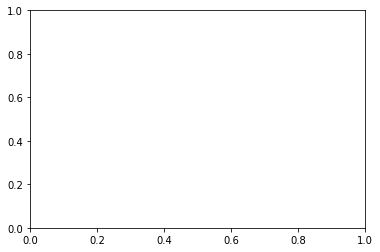

In [ ]:
fig, ax = plt.subplots()

In [ ]:
ax

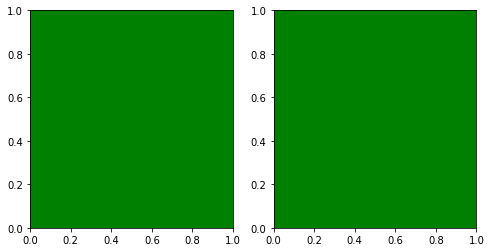

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 4), subplot_kw={'facecolor': 'g'})

In [ ]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11a476b38>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11a85bba8>], dtype=object)

## Drawing into Axes

All plots are drawn into axes. It is easiest to understand how matplotlib works if you use the [object-oriented style](https://matplotlib.org/faq/usage_faq.html#coding-styles).

In [37]:
# create some data to plot
import numpy as np
x = np.linspace(-np.pi, np.pi, 100)
y = np.cos(x)
z = np.sin(6*x)

In [33]:
#plot the like graph of y over x



This does the same thing as

This starts to matter when we have multiple axes to worry about.

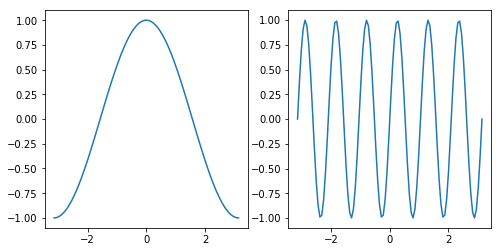

In [ ]:
fig, axes = plt.subplots(figsize=(8, 4), ncols=2)
ax0, ax1 = axes
ax0.plot(x, y)
ax1.plot(x, z)

## Labeling Plots

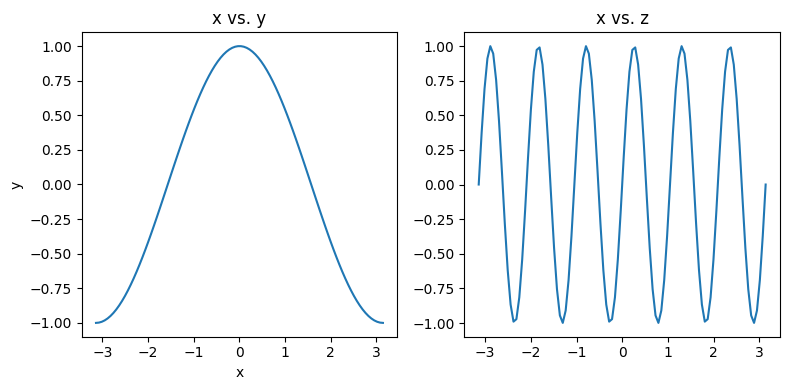

In [38]:
fig, axes = plt.subplots(figsize=(8, 4), ncols=2)
ax0, ax1 = axes

ax0.plot(x, y)
ax0.set_xlabel('x')
ax0.set_ylabel('y')
ax0.set_title('x vs. y')

#label the axis for the second plot
ax1.plot(x, z)

ax1.set_title('x vs. z')

# squeeze everything in
plt.tight_layout()

## Customizing Line Plots

[]

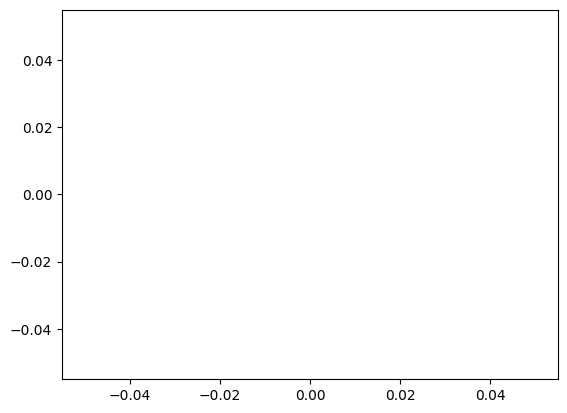

In [50]:
#make a z vs x plot on top of a y vs x plot
fig, ax = plt.subplots()
ax.plot()

It's simple to switch axes

In [51]:
#switch the axes



A "parametric" graph:

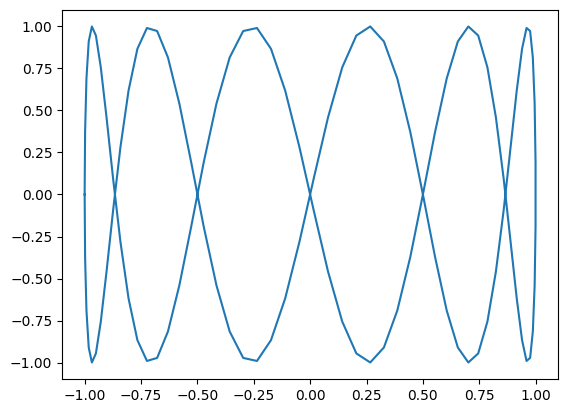

In [52]:
fig, ax = plt.subplots()
ax.plot(y, z)

### Line Styles

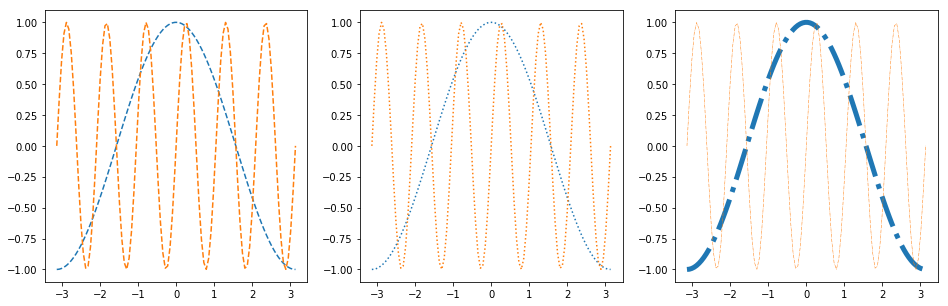

In [ ]:
fig, axes = plt.subplots(figsize=(16, 5), ncols=3)
axes[0].plot(x, y, linestyle='dashed')
axes[0].plot(x, z, linestyle='--')

axes[1].plot(x, y, linestyle='dotted')
axes[1].plot(x, z, linestyle=':')

axes[2].plot(x, y, linestyle='dashdot', linewidth=5)
axes[2].plot(x, z, linestyle='-.', linewidth=0.5)


### Colors

As described in the [colors documentation](https://matplotlib.org/2.0.2/api/colors_api.html), there are some special codes for commonly used colors:

- b: blue
- g: green
- r: red
- c: cyan
- m: magenta
- y: yellow
- k: black
- w: white

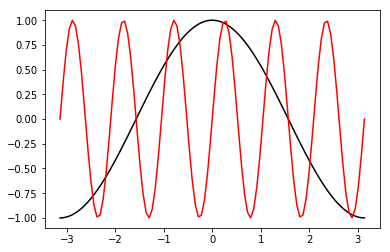

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y, color='k')
ax.plot(x, z, color='r')

Other ways to specify colors:

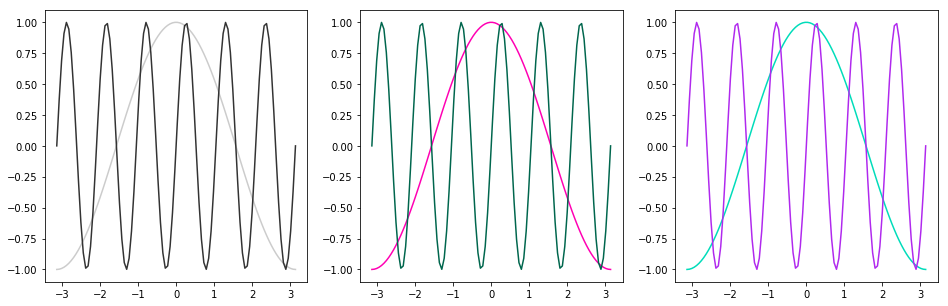

In [ ]:
fig, axes = plt.subplots(figsize=(16, 5), ncols=3)

# grayscale
axes[0].plot(x, y, color='0.8')
axes[0].plot(x, z, color='0.2')

# RGB tuple
axes[1].plot(x, y, color=(1, 0, 0.7))
axes[1].plot(x, z, color=(0, 0.4, 0.3))

# HTML hex code
axes[2].plot(x, y, color='#00dcba')
axes[2].plot(x, z, color='#b029ee')

There is a default color cycle built into matplotlib.

In [ ]:
plt.rcParams['axes.prop_cycle']

cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

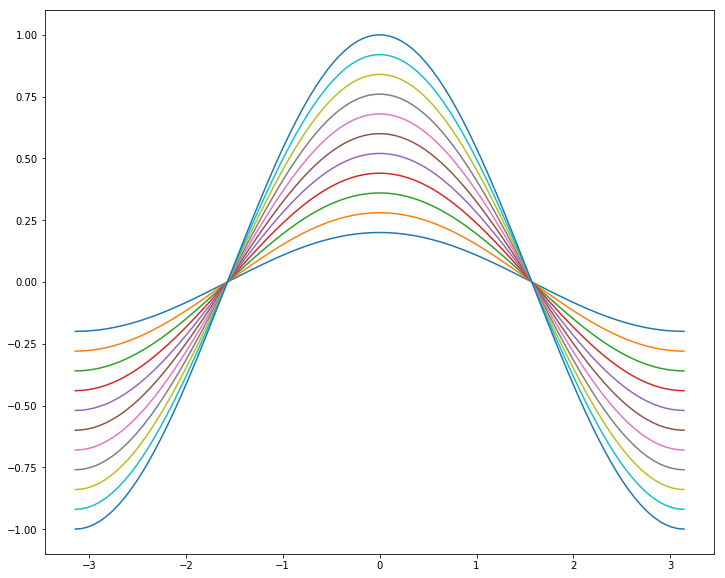

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
for factor in np.linspace(0.2, 1, 11):
    ax.plot(x, factor*y)

### Markers

There are [lots of different markers](https://matplotlib.org/api/markers_api.html) availabile in matplotlib!

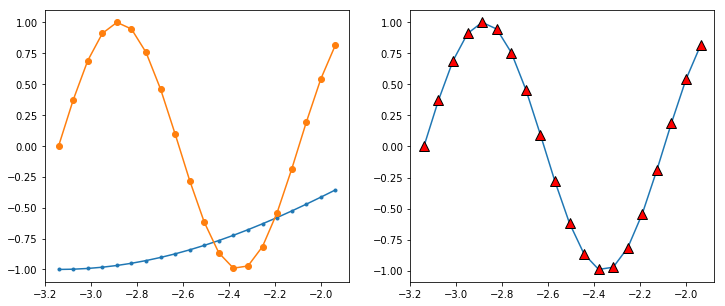

In [ ]:
fig, axes = plt.subplots(figsize=(12, 5), ncols=2)

axes[0].plot(x[:20], y[:20], marker='.')
axes[0].plot(x[:20], z[:20], marker='o')

axes[1].plot(x[:20], z[:20], marker='^',
             markersize=10, markerfacecolor='r',
             markeredgecolor='k')

### Label, Ticks, and Gridlines

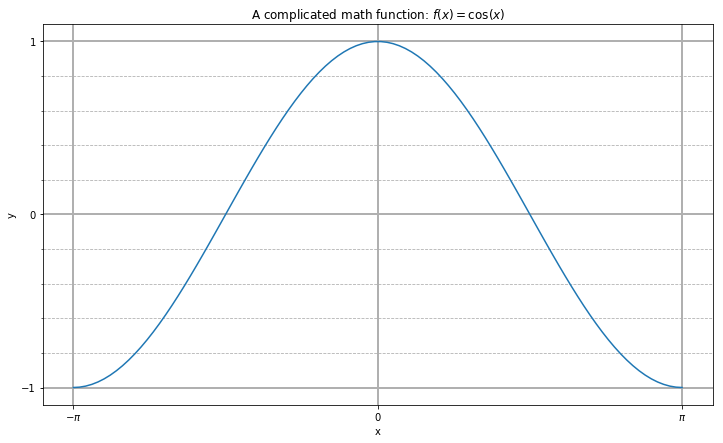

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(x, y)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(r'A complicated math function: $f(x) = \cos(x)$')

ax.set_xticks(np.pi * np.array([-1, 0, 1]))
ax.set_xticklabels([r'$-\pi$', '0', r'$\pi$'])
ax.set_yticks([-1, 0, 1])

ax.set_yticks(np.arange(-1, 1.1, 0.2), minor=True)
#ax.set_xticks(np.arange(-3, 3.1, 0.2), minor=True)

ax.grid(which='minor', linestyle='--')
ax.grid(which='major', linewidth=2)


### Axis Limits

(-3, 3)

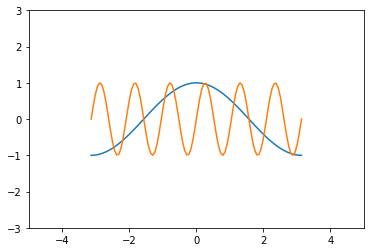

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y, x, z)
ax.set_xlim(-5, 5)
ax.set_ylim(-3, 3)

### Text Annotations

Text(0,0,'the maximum')

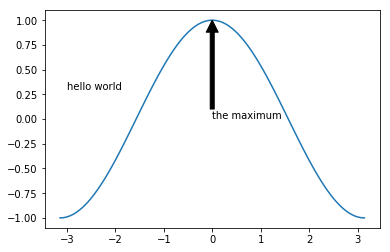

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.text(-3, 0.3, 'hello world')
ax.annotate('the maximum', xy=(0, 1),
             xytext=(0, 0), arrowprops={'facecolor': 'k'})

## Other 1D Plots

### Scatter Plots

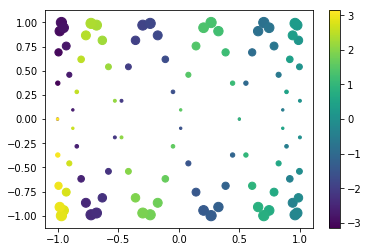

In [ ]:
fig, ax = plt.subplots()

splot = ax.scatter(y, z, c=x, s=(100*z**2 + 5))
fig.colorbar(splot)

### Bar Plots

<Container object of 3 artists>

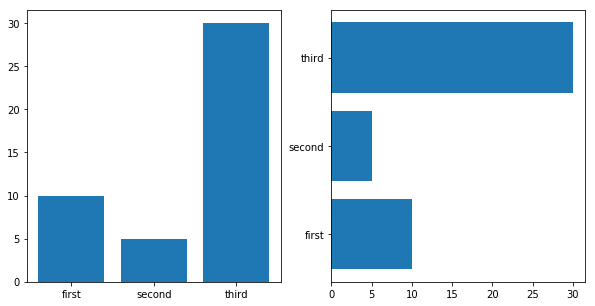

In [ ]:
labels = ['first', 'second', 'third']
values = [10, 5, 30]

fig, axes = plt.subplots(figsize=(10, 5), ncols=2)
axes[0].bar(labels, values)
axes[1].barh(labels, values)

## 2D Plotting Methods

### imshow

In [ ]:
x1d = np.linspace(-2*np.pi, 2*np.pi, 100)
y1d = np.linspace(-np.pi, np.pi, 50)
xx, yy = np.meshgrid(x1d, y1d)
f = np.cos(xx) * np.sin(yy)
print(f.shape)

(50, 100)


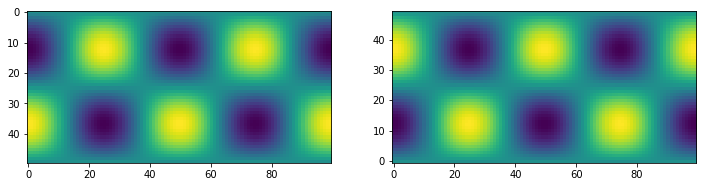

In [ ]:
fig, ax = plt.subplots(figsize=(12,4), ncols=2)
ax[0].imshow(f)
ax[1].imshow(f, origin='bottom')

### pcolormesh

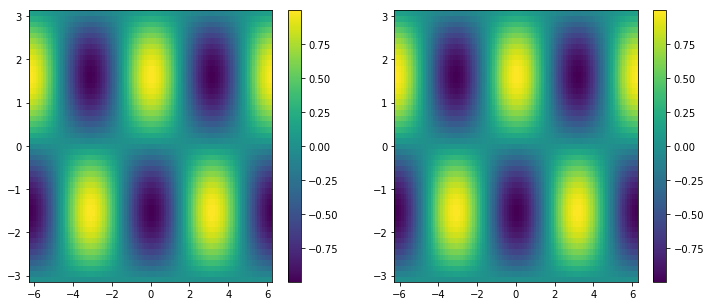

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
pc0 = ax[0].pcolormesh(x1d, y1d, f)
pc1 = ax[1].pcolormesh(xx, yy, f)
fig.colorbar(pc0, ax=ax[0])
fig.colorbar(pc1, ax=ax[1])


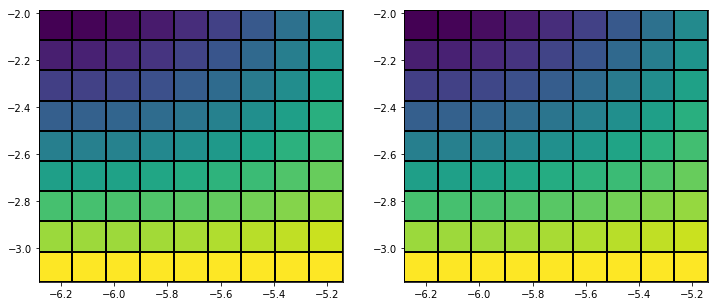

In [ ]:
x_sm, y_sm, f_sm = xx[:10, :10], yy[:10, :10], f[:10, :10]

fig, ax = plt.subplots(figsize=(12,5), ncols=2)

# last row and column ignored!
ax[0].pcolormesh(x_sm, y_sm, f_sm, edgecolors='k')

# same!
ax[1].pcolormesh(x_sm, y_sm, f_sm[:-1, :-1], edgecolors='k')


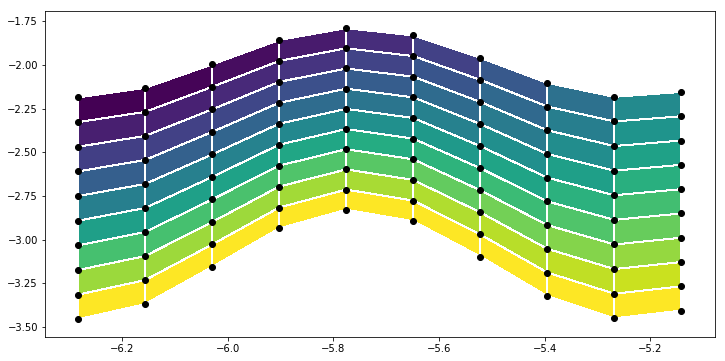

In [ ]:
y_distorted = y_sm*(1 + 0.1*np.cos(6*x_sm))

plt.figure(figsize=(12,6))
plt.pcolormesh(x_sm, y_distorted, f_sm[:-1, :-1], edgecolors='w')
plt.scatter(x_sm, y_distorted, c='k')

### contour / contourf

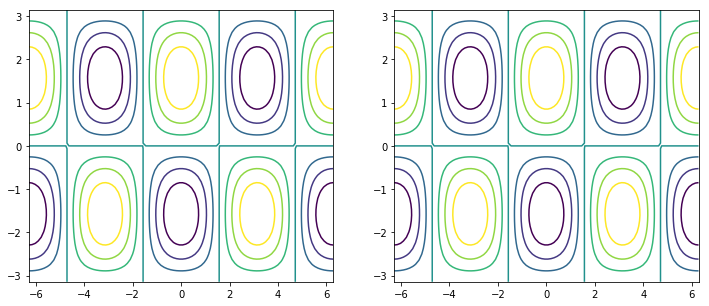

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5), ncols=2)

# same thing!
ax[0].contour(x1d, y1d, f)
ax[1].contour(xx, yy, f)

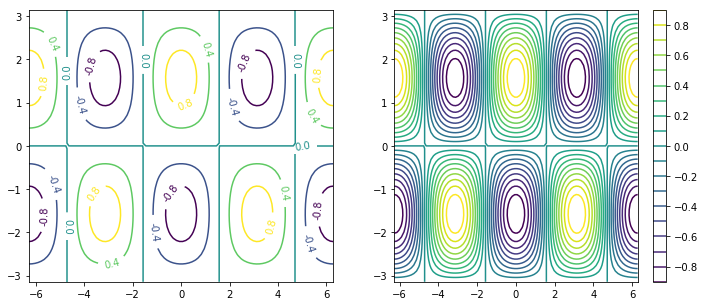

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5), ncols=2)

c0 = ax[0].contour(xx, yy, f, 5)
c1 = ax[1].contour(xx, yy, f, 20)

plt.clabel(c0, fmt='%2.1f')
plt.colorbar(c1, ax=ax[1])

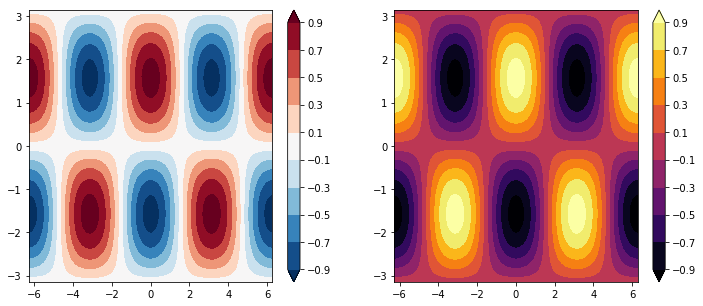

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5), ncols=2)

clevels = np.arange(-1, 1, 0.2) + 0.1

cf0 = ax[0].contourf(xx, yy, f, clevels, cmap='RdBu_r', extend='both')
cf1 = ax[1].contourf(xx, yy, f, clevels, cmap='inferno', extend='both')

fig.colorbar(cf0, ax=ax[0])
fig.colorbar(cf1, ax=ax[1])


### quiver

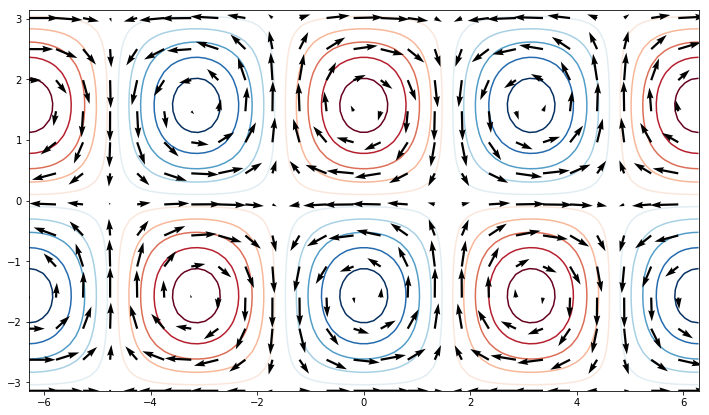

In [ ]:
u = -np.cos(xx) * np.cos(yy)
v = -np.sin(xx) * np.sin(yy)

fig, ax = plt.subplots(figsize=(12, 7))
ax.contour(xx, yy, f, clevels, cmap='RdBu_r', extend='both', zorder=0)
ax.quiver(xx[::4, ::4], yy[::4, ::4],
           u[::4, ::4], v[::4, ::4], zorder=1)

### streamplot

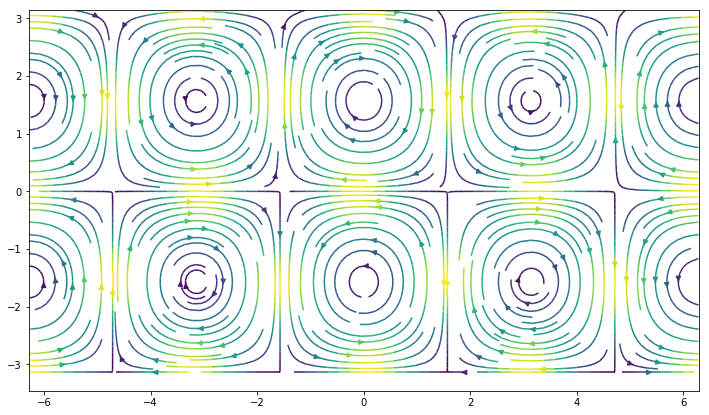

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.streamplot(xx, yy, u, v, density=2, color=(u**2 + v**2))

---

# Exercise: Replicate the Earthquake Map
Here we will make a map plot of earthquakes from a USGS catalog of historic large earthquakes like shown below. Color the earthquakes by log10(depth) and adjust the marker size to be ((magntiude)^4)/100

<img src="https://drive.google.com/uc?export=view&id=1xtBg62X6eK8za_uYDabDaosjDWAfnWiY" width="100%" />

In [ ]:
fname = pooch.retrieve(
    "https://rabernat.github.io/research_computing/signif.txt.tsv.zip",
    known_hash='22b9f7045bf90fb99e14b95b24c81da3c52a0b4c79acf95d72fbe3a257001dbb',
    processor=pooch.Unzip()
)[0]

earthquakes = np.genfromtxt(fname, delimiter='\t')
depth = earthquakes[:, 8]
magnitude = earthquakes[:, 9]
latitude = earthquakes[:, 20]
longitude = earthquakes[:, 21]

Unzipping contents of '/root/.cache/pooch/031a30a92d6a3a2680d86514a24e9321-signif.txt.tsv.zip' to '/root/.cache/pooch/031a30a92d6a3a2680d86514a24e9321-signif.txt.tsv.zip.unzip'


---

# Pandas Fundamentals

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Pandas Data Structures: Series

A Series represents a one-dimensional array of data. The main difference between a Series and numpy array is that a Series has an _index_. The index contains the labels that we use to access the data.

There are many ways to [create a Series](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#series). We will just show a few.

(Data are from the NASA [Planetary Fact Sheet](https://nssdc.gsfc.nasa.gov/planetary/factsheet/).)

In [ ]:
names = ['Mercury', 'Venus', 'Earth']
values = [0.3e24, 4.87e24, 5.97e24]
masses = pd.Series(values, index=names)
masses

Mercury    3.000000e+23
Venus      4.870000e+24
Earth      5.970000e+24
dtype: float64

Series have built in plotting methods.

In [53]:
#display data with bar plot


Arithmetic operations and most numpy function can be applied to Series.
An important point is that the Series keep their index during such operations.

In [ ]:
np.log(masses) / masses**2

Mercury    6.006452e-46
Venus      2.396820e-48
Earth      1.600655e-48
dtype: float64

We can access the underlying index object if we need to:

In [ ]:
masses.index

Index(['Mercury', 'Venus', 'Earth'], dtype='object')

### Indexing

We can get values back out using the index via the `.loc` attribute

In [54]:
#return the value for Earth


Or by raw position using `.iloc`

In [ ]:
masses.iloc[2]

5.97e+24

We can pass a list or array to loc to get multiple rows back:

In [ ]:
masses.loc[['Venus', 'Earth']]

Venus    4.870000e+24
Earth    5.970000e+24
dtype: float64

And we can even use slice notation

In [ ]:
masses.loc['Mercury':'Earth']

Mercury    3.000000e+23
Venus      4.870000e+24
Earth      5.970000e+24
dtype: float64

In [ ]:
masses.iloc[:2]

Mercury    3.000000e+23
Venus      4.870000e+24
dtype: float64

If we need to, we can always get the raw data back out as well

In [ ]:
masses.values # a numpy array

array([3.00e+23, 4.87e+24, 5.97e+24])

In [ ]:
masses.index # a pandas Index object

Index(['Mercury', 'Venus', 'Earth'], dtype='object')

## Pandas Data Structures: DataFrame

There is a lot more to Series, but they are limited to a single "column". A more useful Pandas data structure is the DataFrame. A DataFrame is basically a bunch of series that share the same index. It's a lot like a table in a spreadsheet.

Below we create a DataFrame.

In [63]:
# first we create a dictionary
data = {'mass': [0.3e24, 4.87e24, 5.97e24],       # kg
        'diameter': [4879e3, 12_104e3, 12_756e3], # m
        'rotation_period': [1407.6, np.nan, 23.9] # h
       }
df = pd.DataFrame(data, index=['Mercury', 'Venus', 'Earth'])
df

mass    diameter  rotation_period
Mercury  3.000000e+23   4879000.0           1407.6
Venus    4.870000e+24  12104000.0              NaN
Earth    5.970000e+24  12756000.0             23.9

Pandas handles missing data very elegantly, keeping track of it through all calculations.

In [55]:
#get the info of the dataframe


A wide range of statistical functions are available on both Series and DataFrames.

In [56]:
#min


In [57]:
#mean


In [58]:
#standard deviation


In [59]:
#data statistical summary


We can get a single column as a Series using python's getitem syntax on the DataFrame object.

In [ ]:
df['mass']

Mercury    3.000000e+23
Venus      4.870000e+24
Earth      5.970000e+24
Name: mass, dtype: float64

...or using attribute syntax.

In [ ]:
df.mass

Mercury    3.000000e+23
Venus      4.870000e+24
Earth      5.970000e+24
Name: mass, dtype: float64

Indexing works very similar to series

In [ ]:
df.loc['Earth']

mass               5.970000e+24
diameter           1.275600e+07
rotation_period    2.390000e+01
Name: Earth, dtype: float64

In [ ]:
df.iloc[2]

mass               5.970000e+24
diameter           1.275600e+07
rotation_period    2.390000e+01
Name: Earth, dtype: float64

But we can also specify the column we want to access

In [ ]:
df.loc['Earth', 'mass']

5.97e+24

In [ ]:
df.iloc[:2, 0]

Mercury    3.000000e+23
Venus      4.870000e+24
Name: mass, dtype: float64

If we make a calculation using columns from the DataFrame, it will keep the same index:

In [ ]:
volume =  4/3 * np.pi * (df.diameter/2)**3
df.mass / volume

Mercury    4933.216530
Venus      5244.977070
Earth      5493.285577
dtype: float64

Which we can easily add as another column to the DataFrame:

In [60]:
# add a new column for density


## Merging Data

Pandas supports a wide range of methods for merging different datasets. These are described extensively in the [documentation](https://pandas.pydata.org/pandas-docs/stable/merging.html). Here we just give a few examples.

In [61]:
temperature = pd.Series([167, 464, 15, -65],
                     index=['Mercury', 'Venus', 'Earth', 'Mars'],
                     name='temperature')
temperature

Mercury    167
Venus      464
Earth       15
Mars       -65
Name: temperature, dtype: int64

In [64]:
# returns a new DataFrame
df.join(temperature)

mass    diameter  rotation_period  temperature
Mercury  3.000000e+23   4879000.0           1407.6          167
Venus    4.870000e+24  12104000.0              NaN          464
Earth    5.970000e+24  12756000.0             23.9           15

In [65]:
# returns a new DataFrame
df.join(temperature, how='right')

mass    diameter  rotation_period  temperature
Mercury  3.000000e+23   4879000.0           1407.6          167
Venus    4.870000e+24  12104000.0              NaN          464
Earth    5.970000e+24  12756000.0             23.9           15
Mars              NaN         NaN              NaN          -65

In [ ]:
# returns a new DataFrame
everyone = df.reindex(['Mercury', 'Venus', 'Earth', 'Mars'])
everyone

mass    diameter  rotation_period      density
Mercury  3.000000e+23   4879000.0           1407.6  4933.216530
Venus    4.870000e+24  12104000.0              NaN  5244.977070
Earth    5.970000e+24  12756000.0             23.9  5493.285577
Mars              NaN         NaN              NaN          NaN

We can also index using a boolean series. This is very useful

In [66]:
#return all the planets with mass greater than 4e24



In [67]:
#add a new column called "is-big" if the planets mass is greater than 4e24


### Modifying Values

We often want to modify values in a dataframe based on some rule. To modify values, we need to use `.loc` or `.iloc`

In [68]:
df.loc['Earth', 'mass'] = 5.98+24
df.loc['Venus', 'diameter'] += 1
df

mass    diameter  rotation_period
Mercury  3.000000e+23   4879000.0           1407.6
Venus    4.870000e+24  12104001.0              NaN
Earth    2.998000e+01  12756000.0             23.9

## Plotting

DataFrames have all kinds of [useful plotting](https://pandas.pydata.org/pandas-docs/stable/visualization.html) built in.

<AxesSubplot:xlabel='mass', ylabel='diameter'>

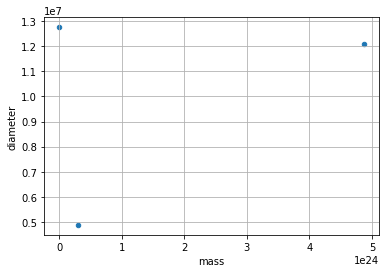

In [ ]:
df.plot(kind='scatter', x='mass', y='diameter', grid=True)

<AxesSubplot:>

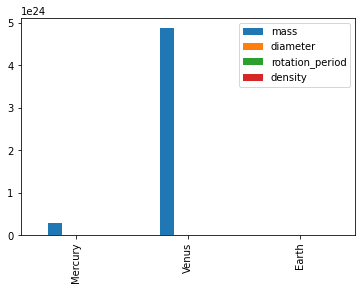

In [ ]:
df.plot(kind='bar')

## Time Indexes

Indexes are very powerful. They are a big part of why Pandas is so useful. There are different indices for different types of data. Time Indexes are especially great!

<AxesSubplot:>

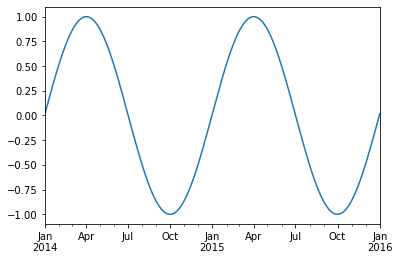

In [ ]:
two_years = pd.date_range(start='2014-01-01', end='2016-01-01', freq='D')
timeseries = pd.Series(np.sin(2 *np.pi *two_years.dayofyear / 365),
                       index=two_years)
timeseries.plot()

We can use python's slicing notation inside `.loc` to select a date range.

<AxesSubplot:>

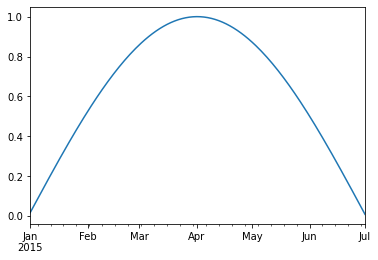

In [ ]:
timeseries.loc['2015-01-01':'2015-07-01'].plot()

The TimeIndex object has lots of useful attributes

In [ ]:
timeseries.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12,  1],
           dtype='int64', length=731)

In [ ]:
timeseries.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            23, 24, 25, 26, 27, 28, 29, 30, 31,  1],
           dtype='int64', length=731)

## Reading Data Files: Weather Station Data

In this example, we will use NOAA weather station data from https://www.ncdc.noaa.gov/data-access/land-based-station-data.

The details of files we are going to read are described in this [README file](ftp://ftp.ncdc.noaa.gov/pub/data/uscrn/products/daily01/README.txt).

In [ ]:
import pooch
POOCH = pooch.create(
    path=pooch.os_cache("noaa-data"),
    base_url="doi:10.5281/zenodo.5564850/",
    registry={
        "data.txt": "md5:5129dcfd19300eb8d4d8d1673fcfbcb4",
    },
)
datafile = POOCH.fetch("data.txt")
datafile

'/root/.cache/noaa-data/data.txt'

In [ ]:
! head '/root/.cache/noaa-data/data.txt'

WBANNO LST_DATE CRX_VN LONGITUDE LATITUDE T_DAILY_MAX T_DAILY_MIN T_DAILY_MEAN T_DAILY_AVG P_DAILY_CALC SOLARAD_DAILY SUR_TEMP_DAILY_TYPE SUR_TEMP_DAILY_MAX SUR_TEMP_DAILY_MIN SUR_TEMP_DAILY_AVG RH_DAILY_MAX RH_DAILY_MIN RH_DAILY_AVG SOIL_MOISTURE_5_DAILY SOIL_MOISTURE_10_DAILY SOIL_MOISTURE_20_DAILY SOIL_MOISTURE_50_DAILY SOIL_MOISTURE_100_DAILY SOIL_TEMP_5_DAILY SOIL_TEMP_10_DAILY SOIL_TEMP_20_DAILY SOIL_TEMP_50_DAILY SOIL_TEMP_100_DAILY 
64756 20170101  2.422  -73.74   41.79     6.6    -5.4     0.6     2.2     0.0     8.68 C     7.9    -6.6    -0.5    84.8    30.7    53.7 -99.000 -99.000   0.207   0.152   0.175    -0.1     0.0     0.6     1.5     3.4
64756 20170102  2.422  -73.74   41.79     4.0    -6.8    -1.4    -1.2     0.0     2.08 C     4.1    -7.1    -1.6    91.1    49.1    77.4 -99.000 -99.000   0.205   0.151   0.173    -0.2     0.0     0.6     1.5     3.3
64756 20170103  2.422  -73.74   41.79     4.9     0.7     2.8     2.7    13.1     0.68 C     3.9     0.1     1.6    96.5 

We now have a text file on our storage called `data.txt`. Examine it.

To read it into pandas, we will use the [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function. This function is incredibly complex and powerful. You can use it to extract data from almost any text file. However, you need to understand how to use its various options.

With no options, this is what we get.

In [ ]:
df = pd.read_csv(datafile)
df.head()

WBANNO LST_DATE CRX_VN LONGITUDE LATITUDE T_DAILY_MAX T_DAILY_MIN T_DAILY_MEAN T_DAILY_AVG P_DAILY_CALC SOLARAD_DAILY SUR_TEMP_DAILY_TYPE SUR_TEMP_DAILY_MAX SUR_TEMP_DAILY_MIN SUR_TEMP_DAILY_AVG RH_DAILY_MAX RH_DAILY_MIN RH_DAILY_AVG SOIL_MOISTURE_5_DAILY SOIL_MOISTURE_10_DAILY SOIL_MOISTURE_20_DAILY SOIL_MOISTURE_50_DAILY SOIL_MOISTURE_100_DAILY SOIL_TEMP_5_DAILY SOIL_TEMP_10_DAILY SOIL_TEMP_20_DAILY SOIL_TEMP_50_DAILY SOIL_TEMP_100_DAILY 
0  64756 20170101  2.422  -73.74   41.79     6.6 ...                                                                                                                                                                                                                                                                                                                                                                                                          
1  64756 20170102  2.422  -73.74   41.79     4.0 ...                                                                                                                                                                                                                                                                                                                                                                                                          
2  64756 20170103  2.422  -73.74   41.79     4.9 ...                                                                                                                                                                                                                                                                                                                                                                                                          
3  64756 20170104  2.422  -73.74   41.79     8.7 ...                                                                                                                                                                                                                                                                                                                                                                                                          
4  64756 20170105  2.422  -73.74   41.79    -0.5 ...

Pandas failed to identify the different columns. This is because it was expecting standard CSV (comma-separated values) file. In our file, instead, the values are separated by whitespace. And not a single whilespace--the amount of whitespace between values varies. We can tell pandas this using the `sep` keyword.

In [ ]:
df = pd.read_csv(datafile, sep='\s+')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3110905342.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(datafile, sep='\s+')


WBANNO  LST_DATE  CRX_VN  LONGITUDE  LATITUDE  T_DAILY_MAX  T_DAILY_MIN  \
0   64756  20170101   2.422     -73.74     41.79          6.6         -5.4   
1   64756  20170102   2.422     -73.74     41.79          4.0         -6.8   
2   64756  20170103   2.422     -73.74     41.79          4.9          0.7   
3   64756  20170104   2.422     -73.74     41.79          8.7         -1.6   
4   64756  20170105   2.422     -73.74     41.79         -0.5         -4.6   

   T_DAILY_MEAN  T_DAILY_AVG  P_DAILY_CALC  ...  SOIL_MOISTURE_5_DAILY  \
0           0.6          2.2           0.0  ...                  -99.0   
1          -1.4         -1.2           0.0  ...                  -99.0   
2           2.8          2.7          13.1  ...                  -99.0   
3           3.6          3.5           1.3  ...                  -99.0   
4          -2.5         -2.8           0.0  ...                  -99.0   

  SOIL_MOISTURE_10_DAILY  SOIL_MOISTURE_20_DAILY  SOIL_MOISTURE_50_DAILY  \
0                  -99.0                   0.207                   0.152   
1                  -99.0                   0.205                   0.151   
2                  -99.0                   0.205                   0.150   
3                  -99.0                   0.215                   0.153   
4                  -99.0                   0.215                   0.154   

   SOIL_MOISTURE_100_DAILY  SOIL_TEMP_5_DAILY  SOIL_TEMP_10_DAILY  \
0                    0.175               -0.1                 0.0   
1                    0.173               -0.2                 0.0   
2                    0.173               -0.1                 0.0   
3                    0.174               -0.1                 0.0   
4                    0.177               -0.1                 0.0   

   SOIL_TEMP_20_DAILY  SOIL_TEMP_50_DAILY  SOIL_TEMP_100_DAILY  
0                 0.6                 1.5                  3.4  
1                 0.6                 1.5                  3.3  
2                 0.5                 1.5                  3.3  
3                 0.5                 1.5                  3.2  
4                 0.5                 1.4                  3.1  

[5 rows x 28 columns]

Great! It worked.

If we look closely, we will see there are lots of -99 and -9999 values in the file. The [README file](ftp://ftp.ncdc.noaa.gov/pub/data/uscrn/products/daily01/README.txt) tells us that these are values used to represent missing data. Let's tell this to pandas.

In [ ]:
df = pd.read_csv(datafile, sep='\s+', na_values=[-9999.0, -99.0])
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-4090761360.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(datafile, sep='\s+', na_values=[-9999.0, -99.0])


WBANNO  LST_DATE  CRX_VN  LONGITUDE  LATITUDE  T_DAILY_MAX  T_DAILY_MIN  \
0   64756  20170101   2.422     -73.74     41.79          6.6         -5.4   
1   64756  20170102   2.422     -73.74     41.79          4.0         -6.8   
2   64756  20170103   2.422     -73.74     41.79          4.9          0.7   
3   64756  20170104   2.422     -73.74     41.79          8.7         -1.6   
4   64756  20170105   2.422     -73.74     41.79         -0.5         -4.6   

   T_DAILY_MEAN  T_DAILY_AVG  P_DAILY_CALC  ...  SOIL_MOISTURE_5_DAILY  \
0           0.6          2.2           0.0  ...                    NaN   
1          -1.4         -1.2           0.0  ...                    NaN   
2           2.8          2.7          13.1  ...                    NaN   
3           3.6          3.5           1.3  ...                    NaN   
4          -2.5         -2.8           0.0  ...                    NaN   

  SOIL_MOISTURE_10_DAILY  SOIL_MOISTURE_20_DAILY  SOIL_MOISTURE_50_DAILY  \
0                    NaN                   0.207                   0.152   
1                    NaN                   0.205                   0.151   
2                    NaN                   0.205                   0.150   
3                    NaN                   0.215                   0.153   
4                    NaN                   0.215                   0.154   

   SOIL_MOISTURE_100_DAILY  SOIL_TEMP_5_DAILY  SOIL_TEMP_10_DAILY  \
0                    0.175               -0.1                 0.0   
1                    0.173               -0.2                 0.0   
2                    0.173               -0.1                 0.0   
3                    0.174               -0.1                 0.0   
4                    0.177               -0.1                 0.0   

   SOIL_TEMP_20_DAILY  SOIL_TEMP_50_DAILY  SOIL_TEMP_100_DAILY  
0                 0.6                 1.5                  3.4  
1                 0.6                 1.5                  3.3  
2                 0.5                 1.5                  3.3  
3                 0.5                 1.5                  3.2  
4                 0.5                 1.4                  3.1  

[5 rows x 28 columns]

Great. The missing data is now represented by `NaN`.

What data types did pandas infer?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   WBANNO                   365 non-null    int64  
 1   LST_DATE                 365 non-null    int64  
 2   CRX_VN                   365 non-null    float64
 3   LONGITUDE                365 non-null    float64
 4   LATITUDE                 365 non-null    float64
 5   T_DAILY_MAX              364 non-null    float64
 6   T_DAILY_MIN              364 non-null    float64
 7   T_DAILY_MEAN             364 non-null    float64
 8   T_DAILY_AVG              364 non-null    float64
 9   P_DAILY_CALC             364 non-null    float64
 10  SOLARAD_DAILY            364 non-null    float64
 11  SUR_TEMP_DAILY_TYPE      365 non-null    object 
 12  SUR_TEMP_DAILY_MAX       364 non-null    float64
 13  SUR_TEMP_DAILY_MIN       364 non-null    float64
 14  SUR_TEMP_DAILY_AVG       3

One problem here is that pandas did not recognize the `LDT_DATE` column as a date. Let's help it.

In [ ]:
df = pd.read_csv(datafile, sep='\s+',
                 na_values=[-9999.0, -99.0],
                 parse_dates=[1])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   WBANNO                   365 non-null    int64         
 1   LST_DATE                 365 non-null    datetime64[ns]
 2   CRX_VN                   365 non-null    float64       
 3   LONGITUDE                365 non-null    float64       
 4   LATITUDE                 365 non-null    float64       
 5   T_DAILY_MAX              364 non-null    float64       
 6   T_DAILY_MIN              364 non-null    float64       
 7   T_DAILY_MEAN             364 non-null    float64       
 8   T_DAILY_AVG              364 non-null    float64       
 9   P_DAILY_CALC             364 non-null    float64       
 10  SOLARAD_DAILY            364 non-null    float64       
 11  SUR_TEMP_DAILY_TYPE      365 non-null    object        
 12  SUR_TEMP_DAILY_MAX       364 non-nul

It worked! Finally, let's tell pandas to use the date column as the index.

In [ ]:
df = df.set_index('LST_DATE')
df.head()

WBANNO  CRX_VN  LONGITUDE  LATITUDE  T_DAILY_MAX  T_DAILY_MIN  \
LST_DATE                                                                    
2017-01-01   64756   2.422     -73.74     41.79          6.6         -5.4   
2017-01-02   64756   2.422     -73.74     41.79          4.0         -6.8   
2017-01-03   64756   2.422     -73.74     41.79          4.9          0.7   
2017-01-04   64756   2.422     -73.74     41.79          8.7         -1.6   
2017-01-05   64756   2.422     -73.74     41.79         -0.5         -4.6   

            T_DAILY_MEAN  T_DAILY_AVG  P_DAILY_CALC  SOLARAD_DAILY  ...  \
LST_DATE                                                            ...   
2017-01-01           0.6          2.2           0.0           8.68  ...   
2017-01-02          -1.4         -1.2           0.0           2.08  ...   
2017-01-03           2.8          2.7          13.1           0.68  ...   
2017-01-04           3.6          3.5           1.3           2.85  ...   
2017-01-05          -2.5         -2.8           0.0           4.90  ...   

           SOIL_MOISTURE_5_DAILY  SOIL_MOISTURE_10_DAILY  \
LST_DATE                                                   
2017-01-01                   NaN                     NaN   
2017-01-02                   NaN                     NaN   
2017-01-03                   NaN                     NaN   
2017-01-04                   NaN                     NaN   
2017-01-05                   NaN                     NaN   

            SOIL_MOISTURE_20_DAILY  SOIL_MOISTURE_50_DAILY  \
LST_DATE                                                     
2017-01-01                   0.207                   0.152   
2017-01-02                   0.205                   0.151   
2017-01-03                   0.205                   0.150   
2017-01-04                   0.215                   0.153   
2017-01-05                   0.215                   0.154   

            SOIL_MOISTURE_100_DAILY  SOIL_TEMP_5_DAILY  SOIL_TEMP_10_DAILY  \
LST_DATE                                                                     
2017-01-01                    0.175               -0.1                 0.0   
2017-01-02                    0.173               -0.2                 0.0   
2017-01-03                    0.173               -0.1                 0.0   
2017-01-04                    0.174               -0.1                 0.0   
2017-01-05                    0.177               -0.1                 0.0   

            SOIL_TEMP_20_DAILY  SOIL_TEMP_50_DAILY  SOIL_TEMP_100_DAILY  
LST_DATE                                                                 
2017-01-01                 0.6                 1.5                  3.4  
2017-01-02                 0.6                 1.5                  3.3  
2017-01-03                 0.5                 1.5                  3.3  
2017-01-04                 0.5                 1.5                  3.2  
2017-01-05                 0.5                 1.4                  3.1  

[5 rows x 27 columns]

We can now access values by time:

In [ ]:
df.loc['2017-08-07']

WBANNO                     64756
CRX_VN                     2.422
LONGITUDE                 -73.74
LATITUDE                   41.79
T_DAILY_MAX                 19.3
T_DAILY_MIN                 12.3
T_DAILY_MEAN                15.8
T_DAILY_AVG                 16.3
P_DAILY_CALC                 4.9
SOLARAD_DAILY               3.93
SUR_TEMP_DAILY_TYPE            C
SUR_TEMP_DAILY_MAX          22.3
SUR_TEMP_DAILY_MIN          11.9
SUR_TEMP_DAILY_AVG          17.7
RH_DAILY_MAX                94.7
RH_DAILY_MIN                76.4
RH_DAILY_AVG                89.5
SOIL_MOISTURE_5_DAILY      0.148
SOIL_MOISTURE_10_DAILY     0.113
SOIL_MOISTURE_20_DAILY     0.094
SOIL_MOISTURE_50_DAILY     0.114
SOIL_MOISTURE_100_DAILY    0.151
SOIL_TEMP_5_DAILY           21.4
SOIL_TEMP_10_DAILY          21.7
SOIL_TEMP_20_DAILY          22.1
SOIL_TEMP_50_DAILY          22.2
SOIL_TEMP_100_DAILY         21.5
Name: 2017-08-07 00:00:00, dtype: object

Or use slicing to get a range:

In [ ]:
df.loc['2017-07-01':'2017-07-31']

WBANNO  CRX_VN  LONGITUDE  LATITUDE  T_DAILY_MAX  T_DAILY_MIN  \
LST_DATE                                                                    
2017-07-01   64756   2.422     -73.74     41.79         28.0         19.7   
2017-07-02   64756   2.422     -73.74     41.79         29.8         18.4   
2017-07-03   64756   2.422     -73.74     41.79         28.3         15.0   
2017-07-04   64756   2.422     -73.74     41.79         26.8         12.6   
2017-07-05   64756   2.422     -73.74     41.79         28.0         11.9   
2017-07-06   64756   2.422     -73.74     41.79         25.7         14.3   
2017-07-07   64756   2.422     -73.74     41.79         25.8         16.8   
2017-07-08   64756   2.422     -73.74     41.79         29.0         15.3   
2017-07-09   64756   2.422     -73.74     41.79         26.3         10.9   
2017-07-10   64756   2.422     -73.74     41.79         27.6         11.8   
2017-07-11   64756   2.422     -73.74     41.79         27.4         19.2   
2017-07-12   64756   2.422     -73.74     41.79         29.4         18.5   
2017-07-13   64756   2.422     -73.74     41.79         29.5         18.3   
2017-07-14   64756   2.422     -73.74     41.79         18.5         15.9   
2017-07-15   64756   2.422     -73.74     41.79         26.6         16.5   
2017-07-16   64756   2.422     -73.74     41.79         27.9         13.3   
2017-07-17   64756   2.422     -73.74     41.79         29.2         16.1   
2017-07-18   64756   2.422     -73.74     41.79         30.3         19.3   
2017-07-19   64756   2.422     -73.74     41.79         31.2         19.1   
2017-07-20   64756   2.422     -73.74     41.79         31.8         16.6   
2017-07-21   64756   2.422     -73.74     41.79         30.6         16.6   
2017-07-22   64756   2.422     -73.74     41.79         27.7         15.6   
2017-07-23   64756   2.422     -73.74     41.79         26.4         18.5   
2017-07-24   64756   2.422     -73.74     41.79         19.4         14.8   
2017-07-25   64756   2.422     -73.74     41.79         18.6         13.7   
2017-07-26   64756   2.422     -73.74     41.79         24.7         11.2   
2017-07-27   64756   2.422     -73.74     41.79         24.2         15.2   
2017-07-28   64756   2.422     -73.74     41.79         26.5         16.9   
2017-07-29   64756   2.422     -73.74     41.79         24.2         10.4   
2017-07-30   64756   2.422     -73.74     41.79         25.5          8.2   
2017-07-31   64756   2.422     -73.74     41.79         29.4         10.1   

            T_DAILY_MEAN  T_DAILY_AVG  P_DAILY_CALC  SOLARAD_DAILY  ...  \
LST_DATE                                                            ...   
2017-07-01          23.9         23.8           0.2          19.28  ...   
2017-07-02          24.1         23.7           4.0          27.67  ...   
2017-07-03          21.7         21.4           0.0          27.08  ...   
2017-07-04          19.7         20.0           0.0          29.45  ...   
2017-07-05          20.0         20.7           0.0          26.90  ...   
2017-07-06          20.0         20.3           0.0          19.03  ...   
2017-07-07          21.3         20.0          11.5          13.88  ...   
2017-07-08          22.1         21.5           0.0          21.92  ...   
2017-07-09          18.6         19.4           0.0          29.72  ...   
2017-07-10          19.7         21.3           0.0          23.67  ...   
2017-07-11          23.3         22.6           8.5          17.79  ...   
2017-07-12          23.9         23.1           1.9          16.27  ...   
2017-07-13          23.9         23.4          23.3          13.61  ...   
2017-07-14          17.2         17.5           4.1           5.36  ...   
2017-07-15          21.5         21.0           0.8          21.13  ...   
2017-07-16          20.6         21.0           0.0          27.03  ...   
2017-07-17          22.6         22.9           0.0          20.47  ...   
2017-07-18          24.8         24.7        

### Quick Statistics

In [ ]:
df.describe()

WBANNO      CRX_VN     LONGITUDE      LATITUDE  T_DAILY_MAX  \
count    365.0  365.000000  3.650000e+02  3.650000e+02   364.000000   
mean   64756.0    2.470767 -7.374000e+01  4.179000e+01    15.720055   
std        0.0    0.085997  5.265234e-13  3.842198e-13    10.502087   
min    64756.0    2.422000 -7.374000e+01  4.179000e+01   -12.300000   
25%    64756.0    2.422000 -7.374000e+01  4.179000e+01     6.900000   
50%    64756.0    2.422000 -7.374000e+01  4.179000e+01    17.450000   
75%    64756.0    2.422000 -7.374000e+01  4.179000e+01    24.850000   
max    64756.0    2.622000 -7.374000e+01  4.179000e+01    33.400000   

       T_DAILY_MIN  T_DAILY_MEAN  T_DAILY_AVG  P_DAILY_CALC  SOLARAD_DAILY  \
count   364.000000    364.000000   364.000000    364.000000     364.000000   
mean      4.037912      9.876374     9.990110      2.797802      13.068187   
std       9.460676      9.727451     9.619168      7.238628       7.953074   
min     -21.800000    -17.000000   -16.700000      0.000000       0.100000   
25%      -2.775000      2.100000     2.275000      0.000000       6.225000   
50%       4.350000     10.850000    11.050000      0.000000      12.865000   
75%      11.900000     18.150000    18.450000      1.400000      19.740000   
max      20.700000     25.700000    26.700000     65.700000      29.910000   

       ...  SOIL_MOISTURE_5_DAILY  SOIL_MOISTURE_10_DAILY  \
count  ...             317.000000              317.000000   
mean   ...               0.189498                0.183991   
std    ...               0.052031                0.054113   
min    ...               0.075000                0.078000   
25%    ...               0.152000                0.139000   
50%    ...               0.192000                0.198000   
75%    ...               0.234000                0.227000   
max    ...               0.296000                0.321000   

       SOIL_MOISTURE_20_DAILY  SOIL_MOISTURE_50_DAILY  \
count              336.000000              364.000000   
mean                 0.165470                0.140192   
std                  0.043989                0.020495   
min                  0.087000                0.101000   
25%                  0.118750                0.118000   
50%                  0.183000                0.147500   
75%                  0.203000                0.157000   
max                  0.235000                0.182000   

       SOIL_MOISTURE_100_DAILY  SOIL_TEMP_5_DAILY  SOIL_TEMP_10_DAILY  \
count               359.000000         364.000000          364.000000   
mean                  0.160630          12.312637           12.320604   
std                   0.016011           9.390034            9.338176   
min                   0.117000          -0.700000           -0.400000   
25%                   0.154000           2.225000            2.000000   
50%                   0.165000          13.300000           13.350000   
75%                   0.173000          21.025000           21.125000   
max                   0.192000          27.600000           27.400000   

       SOIL_TEMP_20_DAILY  SOIL_TEMP_50_DAILY  SOIL_TEMP_100_DAILY  
count          364.000000          364.000000           364.000000  
mean            12.060165           11.978022            11.915659  
std              8.767752            8.078346             7.187317  
min              0.200000            0.900000             1.900000  
25%              2.475000            3.300000             4.100000  
50%             13.100000           12.850000            11.600000  
75%             20.400000           19.800000            19.325000  
max             25.600000           24.100000            22.100000  

[8 rows x 26 columns]

### Plotting Values

We can now quickly make plots of the data

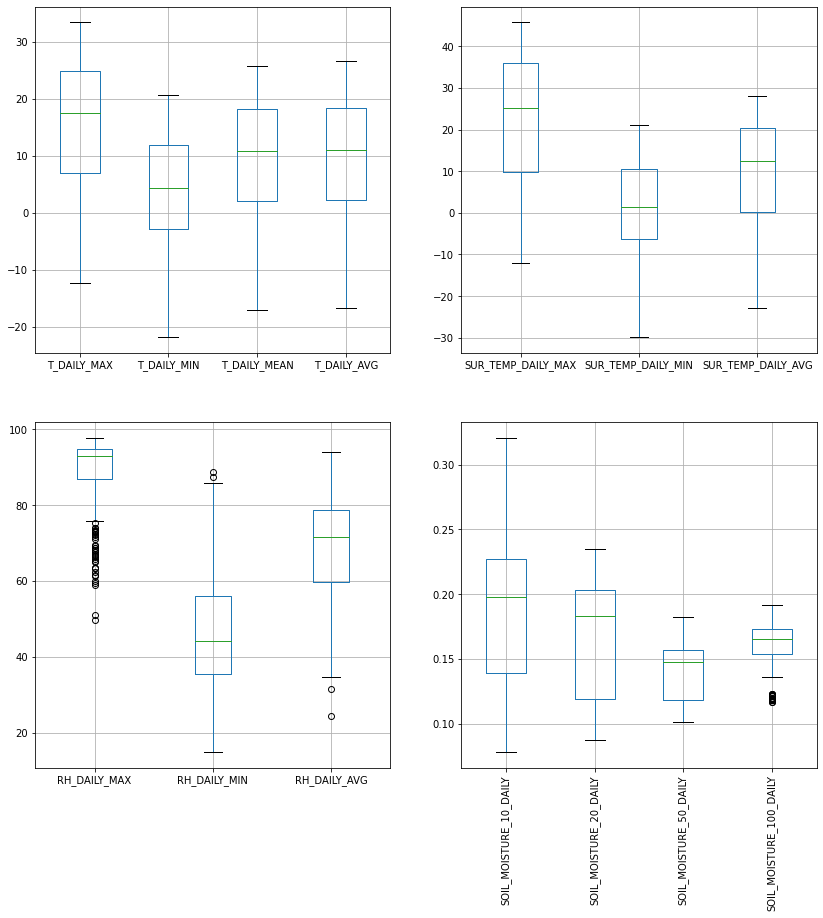

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(14,14))

df.iloc[:, 4:8].boxplot(ax=ax[0,0])
df.iloc[:, 10:14].boxplot(ax=ax[0,1])
df.iloc[:, 14:17].boxplot(ax=ax[1,0])
df.iloc[:, 18:22].boxplot(ax=ax[1,1])


ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=90);

Pandas is very "time aware":

<AxesSubplot:xlabel='LST_DATE'>

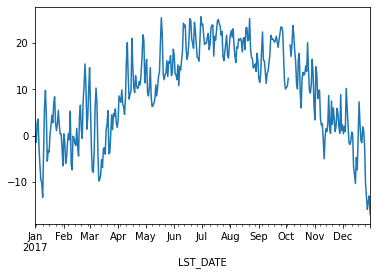

In [ ]:
df.T_DAILY_MEAN.plot()

Note: we could also manually create an axis and plot into it.

Text(0.5, 1.0, 'Pandas Made This!')

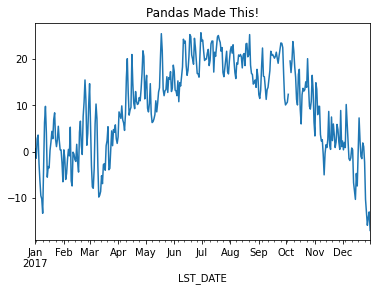

In [ ]:
fig, ax = plt.subplots()
df.T_DAILY_MEAN.plot(ax=ax)
ax.set_title('Pandas Made This!')

<AxesSubplot:xlabel='LST_DATE'>

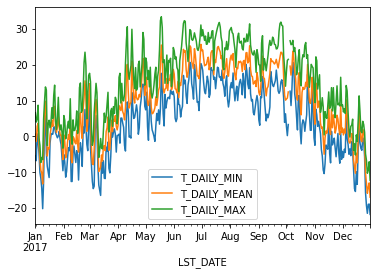

In [ ]:
df[['T_DAILY_MIN', 'T_DAILY_MEAN', 'T_DAILY_MAX']].plot()

### Resampling

Since pandas understands time, we can use it to do resampling.

In [70]:
# monthly reampler object
rs_obj = df.resample('MS')
rs_obj

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [ ]:
rs_obj.mean()

WBANNO    CRX_VN  LONGITUDE  LATITUDE  T_DAILY_MAX  T_DAILY_MIN  \
LST_DATE                                                                       
2017-01-01  64756.0  2.422000     -73.74     41.79     3.945161    -3.993548   
2017-02-01  64756.0  2.422000     -73.74     41.79     7.246429    -4.360714   
2017-03-01  64756.0  2.422000     -73.74     41.79     5.164516    -5.335484   
2017-04-01  64756.0  2.422000     -73.74     41.79    17.813333     5.170000   
2017-05-01  64756.0  2.422000     -73.74     41.79    19.151613     7.338710   
2017-06-01  64756.0  2.422000     -73.74     41.79    25.423333    12.176667   
2017-07-01  64756.0  2.422000     -73.74     41.79    26.912903    15.183871   
2017-08-01  64756.0  2.422000     -73.74     41.79    25.741935    12.954839   
2017-09-01  64756.0  2.422000     -73.74     41.79    24.186667    11.300000   
2017-10-01  64756.0  2.602645     -73.74     41.79    21.043333     7.150000   
2017-11-01  64756.0  2.622000     -73.74     41.79    10.346667    -2.093333   
2017-12-01  64756.0  2.622000     -73.74     41.79     1.496774    -7.412903   

            T_DAILY_MEAN  T_DAILY_AVG  P_DAILY_CALC  SOLARAD_DAILY  ...  \
LST_DATE                                                            ...   
2017-01-01     -0.025806     0.038710      3.090323       4.690000  ...   
2017-02-01      1.442857     1.839286      2.414286      10.364286  ...   
2017-03-01     -0.090323     0.167742      3.970968      13.113548  ...   
2017-04-01     11.493333    11.540000      2.300000      14.645000  ...   
2017-05-01     13.229032    13.638710      4.141935      16.519677  ...   
2017-06-01     18.796667    18.986667      3.743333      21.655000  ...   
2017-07-01     21.048387    20.993548      2.732258      20.566129  ...   
2017-08-01     19.351613    19.477419      2.758065      18.360000  ...   
2017-09-01     17.746667    17.463333      1.893333      15.154667  ...   
2017-10-01     14.100000    13.976667      3.500000      10.395000  ...   
2017-11-01      4.120000     4.336667      0.826667       6.723333  ...   
2017-12-01     -2.967742    -2.838710      2.109677       4.474194  ...   

            SOIL_MOISTURE_5_DAILY  SOIL_MOISTURE_10_DAILY  \
LST_DATE                                                    
2017-01-01               0.236900                0.248300   
2017-02-01               0.226333                0.243000   
2017-03-01               0.218033                0.229267   
2017-04-01               0.199733                0.210300   
2017-05-01               0.206613                0.210935   
2017-06-01               0.185167                0.184300   
2017-07-01               0.131226                0.115774   
2017-08-01               0.143871                0.122258   
2017-09-01               0.145167                0.139633   
2017-10-01               0.151767                0.137767   
2017-11-01               0.241633                0.224467   
2017-12-01               0.255929                0.239071   

            SOIL_MOISTURE_20_DAILY  SOIL_MOISTURE_50_DAILY  \
LST_DATE                                                     
2017-01-01                0.204550                0.152806   
2017-02-01                0.207545                0.152857   
2017-03-01                0.196258                0.153484   
2017-04-01                0.190667                0.151000   
2017-05-01                0.185613                0.147710   
2017-06-01                0.173167                0.142533   
2017-07-01                0.116613                0.121032   
2017-08-01                0.105452                0.115290   
2017-09-01                0.117267                0.112167   
2017-10-01                0.111900                0.108900   
2017-11-01                0.203367                0.159500   
2017-12-01                0.213258                0.165387   

            SOIL_MOISTURE_100_DAILY  SOIL_TEMP_5_DAILY  SOIL_TEMP_10_DAILY  \
LST_DATE                               

We can chain all of that together

<AxesSubplot:xlabel='LST_DATE'>

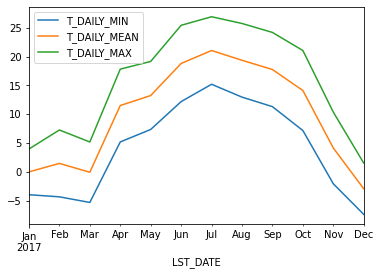

In [ ]:
df_mm = df.resample('MS').mean()
df_mm[['T_DAILY_MIN', 'T_DAILY_MEAN', 'T_DAILY_MAX']].plot()

# Pandas: Groupby

`groupby` is an amazingly powerful function in pandas. But it is also complicated to use and understand.
The point of this lesson is to make you feel confident in using `groupby` and its cousins, `resample` and `rolling`.

These notes are loosely based on the [Pandas GroupBy Documentation](http://pandas.pydata.org/pandas-docs/stable/groupby.html).

The "split/apply/combine" concept was first introduced in a paper by Hadley Wickham: <https://www.jstatsoft.org/article/view/v040i01>.


Imports:

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12,7)
%matplotlib inline
import pandas as pd

First we read the Earthquake data from USGS:

In [74]:
df = pd.read_csv('https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv', parse_dates=['time'], index_col='id')
df['country'] = df.place.str.split(', ').str[-1]
df.head()

time   latitude   longitude  depth  \
id                                                                            
ci41282400   2025-09-03 18:08:44.290000+00:00  36.104832 -117.860496   2.49   
ci41282392   2025-09-03 18:07:31.240000+00:00  35.924500 -117.776833   6.17   
pr2025246003 2025-09-03 18:02:37.530000+00:00  18.818000  -64.824600  12.00   
ci41282368   2025-09-03 17:35:11.440000+00:00  36.105333 -117.858667   3.12   
nn00903723   2025-09-03 17:34:13.670000+00:00  36.564800 -116.609200   3.30   

               mag magType   nst     gap     dmin     rms  ...  \
id                                                         ...   
ci41282400    1.77      ml  26.0   78.00  0.01352  0.1400  ...   
ci41282392    0.76      ml  25.0   38.00  0.04143  0.1500  ...   
pr2025246003  3.73      md  18.0  230.00  0.45260  0.3200  ...   
ci41282368    0.75      ml  20.0   96.00  0.01260  0.0900  ...   
nn00903723    0.50      ml  22.0   88.36  0.06600  0.1464  ...   

                                                          place        type  \
id                                                                            
ci41282400                        10 km NE of Coso Junction, CA  earthquake   
ci41282392                           12 km E of Little Lake, CA  earthquake   
pr2025246003  53 km NNE of Charlotte Amalie, U.S. Virgin Isl...  earthquake   
ci41282368                        10 km NE of Coso Junction, CA  earthquake   
nn00903723               25 km ENE of Furnace Creek, California  earthquake   

             horizontalError depthError  magError  magNst     status  \
id                                                                     
ci41282400              0.30       0.36     0.291    23.0  automatic   
ci41282392              0.17       0.39     0.155    16.0  automatic   
pr2025246003            2.22       3.24     0.100     6.0   reviewed   
ci41282368              0.14       0.22     0.168    12.0   reviewed   
nn00903723               NaN       4.20     0.110     7.0   reviewed   

              locationSource magSource              country  
id                                                           
ci41282400                ci        ci                   CA  
ci41282392                ci        ci                   CA  
pr2025246003              pr        pr  U.S. Virgin Islands  
ci41282368                ci        ci                   CA  
nn00903723                nn        nn           California  

[5 rows x 22 columns]

## An Example

This is an example of a "one-liner" that you can accomplish with groupby.

<Axes: xlabel='country'>

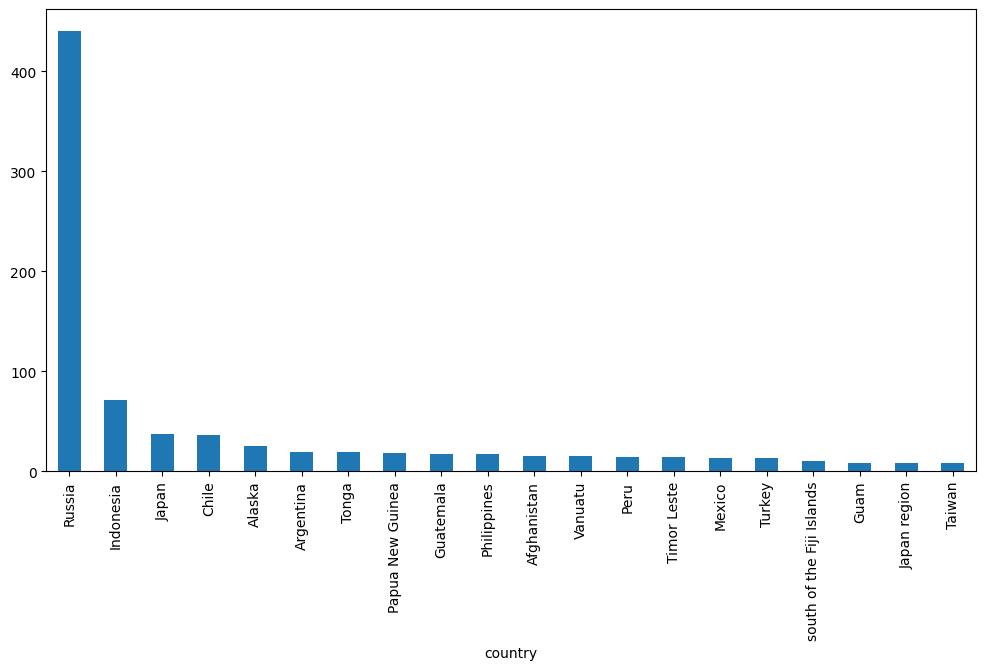

In [ ]:
df_large = df[df.mag>4]
df_large.groupby('country').mag.count().nlargest(20).plot(kind='bar', figsize=(12,6))

In [72]:
#make the bar plot for the locations with magnitude less than 4



## What Happened?

Let's break apart this operation a bit. The workflow with `groubpy` can be divided into three general steps:

1. **Split**: Partition the data into different groups based on some criterion.
1. **Apply**: Do some caclulation within each group. Different types of "apply" steps might be
  1. *Aggregation*: Get the mean or max within the group.
  1. *Transformation*: Normalize all the values within a group
  1. *Filtration*: Eliminate some groups based on a criterion.
1. **Combine**: Put the results back together into a single object.

![split-apply-combine](https://miro.medium.com/max/1840/1*JbF6nhrQsn4f-TaSF6IR9g.png)

### The `groupby` method

Both `Series` and `DataFrame` objects have a groupby method. It accepts a variety of arguments, but the simplest way to think about it is that you pass another series, whose unique values are used to split the original object into different groups.

via <https://medium.com/analytics-vidhya/split-apply-combine-strategy-for-data-mining-4fd6e2a0cc99>

In [75]:
df.groupby(df.country)

There is a shortcut for doing this with dataframes: you just pass the column name:

In [76]:
df.groupby('country')

### The `GroubBy` object

When we call, `groupby` we get back a `GroupBy` object:

In [ ]:
gb = df.groupby('country')
gb

The length tells us how many groups were found:

In [ ]:
len(gb)

262

All of the groups are available as a dictionary via the `.groups` attribute:

In [ ]:
groups = gb.groups
len(groups)

262

In [ ]:
list(groups.keys())

['',
 'Afghanistan',
 'Alaska',
 'Albania',
 'Algeria',
 'American Samoa',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Argentina',
 'Arizona',
 'Aruba',
 'Ascension Island region',
 'Australia',
 'Azerbaijan',
 'Azores Islands region',
 'Azores-Cape St. Vincent Ridge',
 'Balleny Islands region',
 'Banda Sea',
 'Bangladesh',
 'Barbados',
 'Barbuda',
 'Bay of Bengal',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Bouvet Island',
 'Bouvet Island region',
 'Brazil',
 'British Indian Ocean Territory',
 'British Virgin Islands',
 'Burma',
 'Burundi',
 'California',
 'Canada',
 'Cape Verde',
 'Carlsberg Ridge',
 'Cayman Islands',
 'Celebes Sea',
 'Central East Pacific Rise',
 'Central Mid-Atlantic Ridge',
 'Chagos Archipelago region',
 'Chile',
 'China',
 'Christmas Island',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Crozet Islands region',
 'Cuba',
 'Cyprus',
 'Davis Strait',
 'Democratic Republic of the Congo',
 'Djibouti',
 'Dominica',
 'Dominican Republic',


### Iterating and selecting groups

You can loop through the groups if you want.

In [ ]:
for key, group in gb:
    display(group.head())
    print(f'The key is "{key}"')
    break

time  latitude  longitude   depth  mag magType  \
id                                                                             
usc000mkc8 2014-01-25 16:10:38.760  -55.2925   -27.0527   10.00  4.1      mb   
usc000mkc7 2014-01-25 09:43:23.230  -55.9434   -27.6772  103.48  4.3      mb   
usc000mh0c 2014-01-19 15:42:45.510  -56.9656   -26.7803  120.25  4.6      mb   
usb000m7f2 2014-01-10 13:50:38.730  -56.0110   -26.1186   10.00  4.2      mb   
usb000m78v 2014-01-07 06:51:09.160  -56.9651   -26.6696  124.37  4.3      mb   

            nst    gap   dmin   rms net                   updated  \
id                                                                  
usc000mkc8  NaN   97.0  5.553  0.35  us  2014-03-27T18:15:40.000Z   
usc000mkc7  NaN   87.0  5.324  0.62  us  2014-03-27T18:15:40.000Z   
usc000mh0c  NaN  151.0  6.120  0.39  us  2014-03-22T00:05:23.000Z   
usb000m7f2  NaN  106.0  6.192  0.71  us  2014-03-15T03:38:58.000Z   
usb000m78v  NaN  109.0  6.176  0.59  us  2014-03-07T00:26:01.000Z   

                                   place        type country  
id                                                            
usc000mkc8   156km N of Visokoi Island,   earthquake          
usc000mkc7  89km NNW of Visokoi Island,   earthquake          
usc000mh0c   39km SE of Visokoi Island,   earthquake          
usb000m7f2  101km NE of Visokoi Island,   earthquake          
usb000m78v   43km SE of Visokoi Island,   earthquake

The key is ""


And you can get a specific group by key.

In [ ]:
gb.get_group('Chile').head()

time  latitude  longitude   depth  mag magType  \
id                                                                             
usc000mqlq 2014-01-31 20:00:16.000  -33.6550   -71.9810   25.10  4.5      mb   
usc000mql6 2014-01-31 13:48:23.000  -18.0690   -69.6630  149.10  4.3      mb   
usc000mqk8 2014-01-30 14:20:56.560  -19.6118   -70.9487   15.16  4.1      mb   
usc000mdi2 2014-01-30 10:02:14.000  -32.1180   -71.7860   25.70  4.5     mwr   
usc000mqeh 2014-01-29 18:58:23.000  -18.6610   -69.6440  123.10  4.8      mb   

            nst    gap   dmin   rms net                   updated  \
id                                                                  
usc000mqlq  NaN    NaN    NaN  1.63  us  2014-04-08T01:43:19.000Z   
usc000mql6  NaN    NaN    NaN  1.77  us  2014-04-08T01:43:18.000Z   
usc000mqk8  NaN  159.0  1.227  1.34  us  2014-04-08T01:43:17.000Z   
usc000mdi2  NaN    NaN    NaN  1.10  us  2015-01-30T21:28:21.955Z   
usc000mqeh  NaN    NaN    NaN  1.52  us  2014-04-08T01:43:16.000Z   

                                     place        type country  
id                                                              
usc000mqlq  34km WSW of San Antonio, Chile  earthquake   Chile  
usc000mql6         17km NW of Putre, Chile  earthquake   Chile  
usc000mqk8      107km NW of Iquique, Chile  earthquake   Chile  
usc000mdi2      64km NW of La Ligua, Chile  earthquake   Chile  
usc000mqeh          51km S of Putre, Chile  earthquake   Chile

## Aggregation

Now that we know how to create a `GroupBy` object, let's learn how to do aggregation on it.

One way us to use the `.aggregate` method, which accepts another function as its argument. The result is automatically combined into a new dataframe with the group key as the index.

In [ ]:
gb.aggregate(np.max).head()

time  latitude  longitude   depth  mag magType  \
country                                                                         
            2014-12-31 14:49:19.200  -37.5219    78.9418  248.18  6.9     mww   
Afghanistan 2014-12-27 06:37:50.010   37.0112    71.6062  248.39  5.6     mww   
Alaska      2014-12-30 21:22:21.580   67.9858   179.9288  266.61  7.9     mww   
Albania     2014-05-20 04:43:25.500   41.5297    20.2804   28.26  5.0     mwr   
Algeria     2014-12-26 17:55:18.140   36.9391     5.6063   21.40  5.5     mww   

               nst    gap    dmin   rms net                   updated  \
country                                                                 
               NaN  195.0  28.762  1.47  us  2015-03-17T02:38:27.040Z   
Afghanistan    NaN  172.0   3.505  1.55  us  2015-06-22T20:12:10.712Z   
Alaska       152.0  338.0   7.712  2.15  us  2015-05-30T05:34:08.822Z   
Albania        NaN   69.0   1.299  1.34  us  2015-01-30T15:28:03.533Z   
Algeria        NaN  174.0   3.250  1.45  us  2015-03-17T02:37:18.040Z   

                                               place        type  
country                                                           
                         99km NW of Visokoi Island,   earthquake  
Afghanistan         8km SE of Ashkasham, Afghanistan  earthquake  
Alaska       9km WSW of Little Sitkin Island, Alaska  earthquake  
Albania                    6km NE of Durres, Albania  earthquake  
Algeria                  5km SSW of Bougara, Algeria  earthquake

By default, the operation is applied to every column. That's usually not what we want. We can use both `.` or `[]` syntax to select a specific column to operate on. Then we get back a series.

In [ ]:
gb.mag.aggregate(np.max).head()

country
               6.9
Afghanistan    5.6
Alaska         7.9
Albania        5.0
Algeria        5.5
Name: mag, dtype: float64

In [ ]:
gb.mag.aggregate(np.max).nlargest(10)

country
Chile                         8.2
Alaska                        7.9
Solomon Islands               7.6
Papua New Guinea              7.5
El Salvador                   7.3
Mexico                        7.2
Fiji                          7.1
Indonesia                     7.1
Southern East Pacific Rise    7.0
                              6.9
Name: mag, dtype: float64

There are shortcuts for common aggregation functions:

In [ ]:
gb.mag.max().nlargest(10)

country
Chile                         8.2
Alaska                        7.9
Solomon Islands               7.6
Papua New Guinea              7.5
El Salvador                   7.3
Mexico                        7.2
Fiji                          7.1
Indonesia                     7.1
Southern East Pacific Rise    7.0
                              6.9
Name: mag, dtype: float64

In [ ]:
gb.mag.min().nsmallest(10)

country
Mexico         4.01
Oregon         4.02
California     4.04
               4.10
Afghanistan    4.10
Alaska         4.10
Albania        4.10
Algeria        4.10
Angola         4.10
Antarctica     4.10
Name: mag, dtype: float64

In [ ]:
gb.mag.mean().nlargest(10)

country
South Napa Earthquake          6.020000
Bouvet Island region           5.750000
South Georgia Island region    5.450000
Barbados                       5.400000
New Mexico                     5.300000
Easter Island region           5.162500
Malawi                         5.100000
Drake Passage                  5.033333
North Korea                    5.000000
Saint Lucia                    5.000000
Name: mag, dtype: float64

In [ ]:
gb.mag.std().nlargest(10)

country
Barbados                              1.555635
Bouvet Island region                  1.484924
Puerto Rico                           0.957601
Off the coast of Ecuador              0.848528
Palau region                          0.777817
East of the South Sandwich Islands    0.606495
Southern East Pacific Rise            0.604508
South Indian Ocean                    0.602194
Prince Edward Islands region          0.595259
Panama                                0.591322
Name: mag, dtype: float64

We can also apply multiple functions at once:

In [ ]:
gb.mag.aggregate([np.min, np.max, np.mean]).head()

amin  amax      mean
country                          
              4.1   6.9  4.582544
Afghanistan   4.1   5.6  4.410656
Alaska        4.1   7.9  4.515025
Albania       4.1   5.0  4.391667
Algeria       4.1   5.5  4.583333

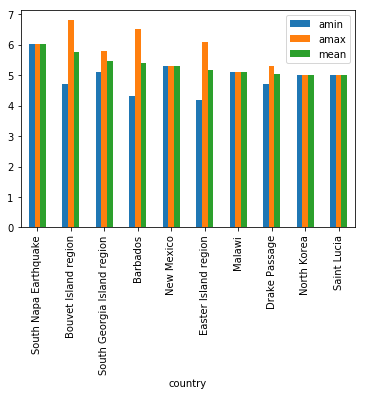

In [ ]:
gb.mag.aggregate([np.min, np.max, np.mean]).nlargest(10, 'mean').plot(kind='bar')

## Transformation

The key difference between aggregation and transformation is that aggregation returns a *smaller* object than the original, indexed by the group keys, while *transformation* returns an object with the same index (and same size) as the original object. Groupby + transformation is used when applying an operation that requires information about the whole group.

In this example, we standardize the earthquakes in each country so that the distribution has zero mean and unit variance. We do this by first defining a function called `standardize` and then passing it to the `transform` method.

I admit that I don't know why you would want to do this. `transform` makes more sense to me in the context of time grouping operation. See below for another example.

In [ ]:
def standardize(x):
    return (x - x.mean())/x.std()

mag_standardized_by_country = gb.mag.transform(standardize)
mag_standardized_by_country.head()

id
usc000mqlp   -0.915774
usc000mqln   -0.675696
usc000mqls   -0.282385
usc000mf1x   -0.684915
usc000mqlm   -0.666807
Name: mag, dtype: float64

## Time Grouping

We already saw how pandas has a strong built-in understanding of time. This capability is even more powerful in the context of `groupby`. With datasets indexed by a pandas `DateTimeIndex`, we can easily group and resample the data using common time units.

To get started, let's load the timeseries data we already explored in past exercises.

In [77]:
import urllib
import pandas as pd

header_url = 'ftp://ftp.ncdc.noaa.gov/pub/data/uscrn/products/daily01/HEADERS.txt'
with urllib.request.urlopen(header_url) as response:
    data = response.read().decode('utf-8')
lines = data.split('\n')
headers = lines[1].split(' ')

ftp_base = 'ftp://ftp.ncdc.noaa.gov/pub/data/uscrn/products/daily01/'
dframes = []
for year in range(2016, 2019):
    data_url = f'{year}/CRND0103-{year}-NY_Millbrook_3_W.txt'
    df = pd.read_csv(ftp_base + data_url, parse_dates=[1],
                     names=headers, header=None, sep='\s+',
                     na_values=[-9999.0, -99.0])
    dframes.append(df)

df = pd.concat(dframes)
df = df.set_index('LST_DATE')

<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1262717338.py:15: SyntaxWarning: invalid escape sequence '\s'
  names=headers, header=None, sep='\s+',


In [78]:
df.head()

WBANNO  CRX_VN  LONGITUDE  LATITUDE  T_DAILY_MAX  T_DAILY_MIN  \
LST_DATE                                                                    
2016-01-01   64756   2.422     -73.74     41.79          3.4         -0.5   
2016-01-02   64756   2.422     -73.74     41.79          2.9         -3.6   
2016-01-03   64756   2.422     -73.74     41.79          5.1         -1.8   
2016-01-04   64756   2.422     -73.74     41.79          0.5        -14.4   
2016-01-05   64756   2.422     -73.74     41.79         -5.2        -15.5   

            T_DAILY_MEAN  T_DAILY_AVG  P_DAILY_CALC  SOLARAD_DAILY  ...  \
LST_DATE                                                            ...   
2016-01-01           1.5          1.3           0.0           1.69  ...   
2016-01-02          -0.4         -0.3           0.0           6.25  ...   
2016-01-03           1.6          1.1           0.0           5.69  ...   
2016-01-04          -6.9         -7.5           0.0           9.17  ...   
2016-01-05         -10.3        -11.7           0.0           9.34  ...   

           SOIL_MOISTURE_10_DAILY  SOIL_MOISTURE_20_DAILY  \
LST_DATE                                                    
2016-01-01                  0.233                   0.204   
2016-01-02                  0.227                   0.199   
2016-01-03                  0.223                   0.196   
2016-01-04                  0.220                   0.194   
2016-01-05                  0.213                   0.191   

            SOIL_MOISTURE_50_DAILY  SOIL_MOISTURE_100_DAILY  \
LST_DATE                                                      
2016-01-01                   0.155                    0.147   
2016-01-02                   0.152                    0.144   
2016-01-03                   0.151                    0.141   
2016-01-04                   0.148                    0.139   
2016-01-05                   0.148                    0.138   

            SOIL_TEMP_5_DAILY  SOIL_TEMP_10_DAILY  SOIL_TEMP_20_DAILY  \
LST_DATE                                                                
2016-01-01                4.2                 4.4                 5.1   
2016-01-02                2.8                 3.1                 4.2   
2016-01-03                2.6                 2.8                 3.8   
2016-01-04                1.7                 2.1                 3.4   
2016-01-05                0.4                 0.9                 2.4   

            SOIL_TEMP_50_DAILY  SOIL_TEMP_100_DAILY      
LST_DATE                                                 
2016-01-01                 6.0                  7.6 NaN  
2016-01-02                 5.7                  7.4 NaN  
2016-01-03                 5.2                  7.2 NaN  
2016-01-04                 4.9                  6.9 NaN  
2016-01-05                 4.3                  6.6 NaN  

[5 rows x 28 columns]

This timeseries has daily resolution, and the daily plots are somewhat noisy.

<Axes: xlabel='LST_DATE'>

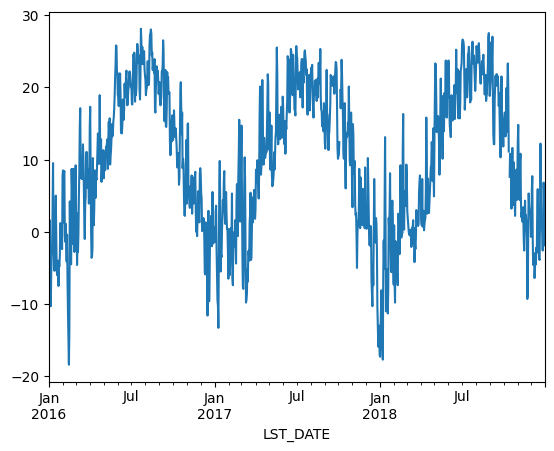

In [ ]:
df.T_DAILY_MEAN.plot()

A common way to analyze such data in climate science is to create a "climatology," which contains the average values in each month or day of the year. We can do this easily with groupby. Recall that `df.index` is a pandas `DateTimeIndex` object.

In [ ]:
df = df.drop('SUR_TEMP_DAILY_TYPE', axis=1)

monthly_climatology = df.groupby(df.index.month).mean()
monthly_climatology

WBANNO    CRX_VN  LONGITUDE  LATITUDE  T_DAILY_MAX  T_DAILY_MIN  \
LST_DATE                                                                     
1         64756.0  2.488667     -73.74     41.79     2.924731    -7.122581   
2         64756.0  2.487882     -73.74     41.79     6.431765    -5.015294   
3         64756.0  2.488667     -73.74     41.79     7.953763    -3.035484   
4         64756.0  2.488667     -73.74     41.79    14.793333     1.816667   
5         64756.0  2.488667     -73.74     41.79    21.235484     8.460215   
6         64756.0  2.488667     -73.74     41.79    25.627778    11.837778   
7         64756.0  2.488667     -73.74     41.79    28.568817    15.536559   
8         64756.0  2.488667     -73.74     41.79    27.473118    15.351613   
9         64756.0  2.488667     -73.74     41.79    24.084444    12.032222   
10        64756.0  2.548882     -73.74     41.79    18.127473     5.757143   
11        64756.0  2.555333     -73.74     41.79     9.586667    -1.375556   
12        64756.0  2.555333     -73.74     41.79     3.569892    -5.704301   

          T_DAILY_MEAN  T_DAILY_AVG  P_DAILY_CALC  SOLARAD_DAILY  ...  \
LST_DATE                                                          ...   
1            -2.100000    -1.905376      2.478495       5.812258  ...   
2             0.712941     1.022353      4.077647       8.495882  ...   
3             2.455914     2.643011      2.788172      13.211290  ...   
4             8.302222     8.574444      2.396667      15.295889  ...   
5            14.850538    15.121505      3.015054      17.288602  ...   
6            18.733333    19.026667      3.053333      21.913333  ...   
7            22.054839    22.012903      3.865591      21.570645  ...   
8            21.410753    21.378495      4.480645      18.493333  ...   
9            18.057778    17.866667      3.730000      13.625667  ...   
10           11.938462    11.952747      3.228261       9.442527  ...   
11            4.097778     4.277778      3.991111       6.350111  ...   
12           -1.069892    -0.850538      2.791398       4.708602  ...   

          SOIL_MOISTURE_10_DAILY  SOIL_MOISTURE_20_DAILY  \
LST_DATE                                                   
1                       0.240250                0.200698   
2                       0.247714                0.210044   
3                       0.228612                0.203634   
4                       0.214067                0.195844   
5                       0.204796                0.187097   
6                       0.136911                0.135211   
7                       0.105806                0.095204   
8                       0.156161                0.132333   
9                       0.136900                0.126422   
10                      0.155275                0.128462   
11                      0.226111                0.212200   
12                      0.259527                0.221280   

          SOIL_MOISTURE_50_DAILY  SOIL_MOISTURE_100_DAILY  SOIL_TEMP_5_DAILY  \
LST_DATE                                                                       
1                       0.153645                 0.160859           0.150538   
2                       0.159153                 0.163889           1.216471   
3                       0.157796                 0.160366           3.450538   
4                       0.153878                 0.158100           9.415556   
5                       0.148871                 0.155720          16.934409   
6                       0.129422                 0.152711          22.403333   
7                       0.114419                 0.150000          25.448387   
8                       0.128796                 0.158750          24.758065   
9                       0.121356                 0.154000          21.028889   
10                      0.120187                 0.144588          14.872527   
11                      0.164778                 0.163078           6.777778   
12            

Each row in this new dataframe respresents the average values for the months (1=January, 2=February, etc.)

We can apply more customized aggregations, as with any groupby operation. Below we keep the mean of the mean, max of the max, and min of the min for the temperature measurements.

In [ ]:
monthly_T_climatology = df.groupby(df.index.month).aggregate({'T_DAILY_MEAN': 'mean',
                                                              'T_DAILY_MAX': 'max',
                                                              'T_DAILY_MIN': 'min'})
monthly_T_climatology.head()

T_DAILY_MEAN  T_DAILY_MAX  T_DAILY_MIN
LST_DATE                                        
1            -2.100000         16.9        -26.0
2             0.712941         24.9        -24.7
3             2.455914         26.8        -16.5
4             8.302222         30.6        -11.3
5            14.850538         33.4         -1.6

<Axes: xlabel='LST_DATE'>

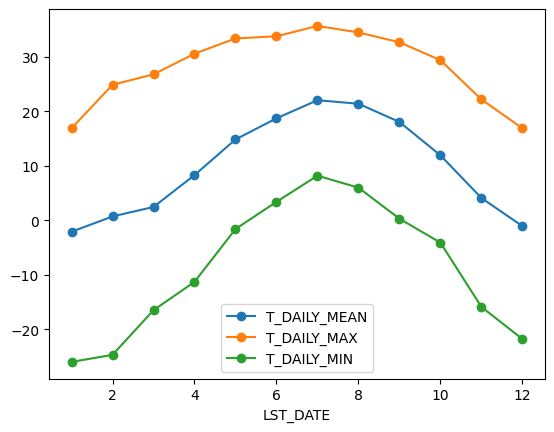

In [ ]:
monthly_T_climatology.plot(marker='o')

If we want to do it on a finer scale, we can group by day of year.

<Axes: xlabel='LST_DATE'>

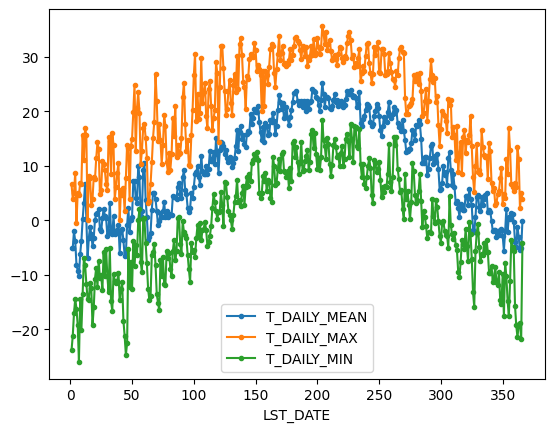

In [ ]:
daily_T_climatology = df.groupby(df.index.dayofyear).aggregate({'T_DAILY_MEAN': 'mean',
                                                            'T_DAILY_MAX': 'max',
                                                            'T_DAILY_MIN': 'min'})
daily_T_climatology.plot(marker='.')

### Calculating anomalies

A common mode of analysis in climate science is to remove the climatology from a signal to focus only on the "anomaly" values. This can be accomplished with transformation.

<Axes: xlabel='LST_DATE'>

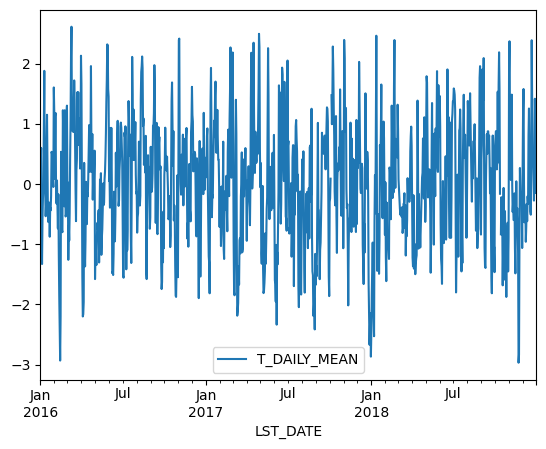

In [ ]:
def standardize(x):
    return (x - x.mean())/x.std()

anomaly = df.groupby(df.index.month).transform(standardize)
anomaly.plot(y='T_DAILY_MEAN')

### Resampling

Another common operation is to change the resolution of a dataset by resampling in time. Pandas exposes this through the [resample](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#resampling) function. The resample periods are specified using pandas [offset index](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases) syntax.

Below we resample the dataset by taking the mean over each month.

/tmp/ipython-input-3535943585.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').mean().plot(y='T_DAILY_MEAN', marker='o')


<Axes: xlabel='LST_DATE'>

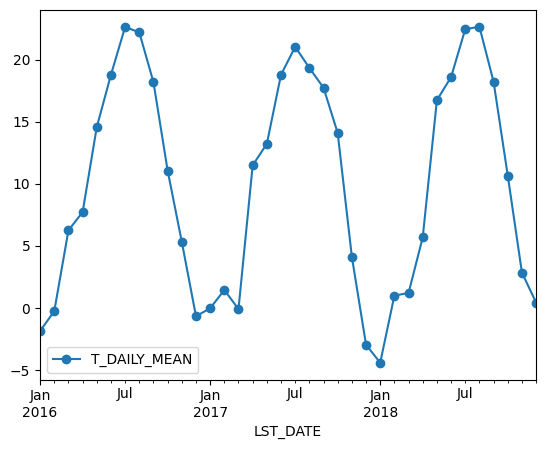

In [ ]:
df.resample('M').mean().plot(y='T_DAILY_MEAN', marker='o')

Just like with `groupby`, we can apply any aggregation function to our `resample` operation.

/tmp/ipython-input-2688213887.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').max().plot(y='T_DAILY_MAX', marker='o')


<Axes: xlabel='LST_DATE'>

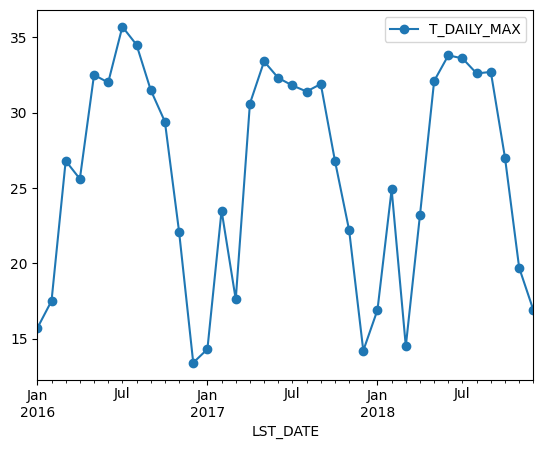

In [ ]:
df.resample('M').max().plot(y='T_DAILY_MAX', marker='o')

### Rolling Operations

The final category of operations applies to "rolling windows". (See [rolling](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html) documentation.) We specify a function to apply over a moving window along the index. We specify the size of the window and, optionally, the weights. We also use the keyword `centered` to tell pandas whether to center the operation around the midpoint of the window.

<Axes: xlabel='LST_DATE'>

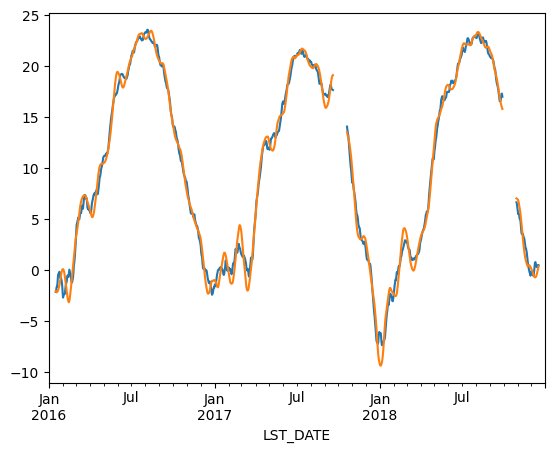

In [ ]:
df.rolling(30, center=True).T_DAILY_MEAN.mean().plot()
df.rolling(30, center=True, win_type='triang').T_DAILY_MEAN.mean().plot()

# Bonus Exercise: Pandas Groupby with Hurricane Data

Use the following code to load a CSV file of the NOAA IBTrACS hurricane dataset:

```
url = 'https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.ALL.list.v04r00.csv'
df = pd.read_csv(url, parse_dates=['ISO_TIME'], usecols=range(12),
                 skiprows=[1], na_values=[' ', 'NOT_NAMED'],
                 keep_default_na=False, dtype={'NAME': str})
df.head()
```

Basin Key: (NI - North Indian, SI - South Indian, WP - Western Pacific, SP - Southern Pacific, EP - Eastern Pacific, NA - North Atlantic)

How many rows does this dataset have?

How many North Atlantic hurricanes are in this dataset?

1) Get the unique values of the BASIN, SUBBASIN, and NATURE columns
2) Rename the WMO_WIND and WMO_PRES columns to WIND and PRES
3) Get the 10 largest rows in the dataset by WIND
You will notice some names are repeated.

4) Group the data on SID and get the 10 largest hurricanes by WIND
5) Make a bar chart of the wind speed of the 20 strongest-wind hurricanes
Use the name on the x-axis.

6) Plot the count of all datapoints by Basin
as a bar chart

7) Plot the count of unique hurricanes by Basin
as a bar chart.

8) Make a hexbin of the location of datapoints in Latitude and Longitude
9) Find Hurricane Katrina (from 2005) and plot its track as a scatter plot
First find the SID of this hurricane.

Next get this hurricane’s group and plot its position as a scatter plot. Use wind speed to color the points.

10) Make time the index on your dataframe
11) Plot the count of all datapoints per year as a timeseries
You should use resample

12) Plot all tracks from the North Atlantic in 2005
You will probably have to iterate through a GroupBy object

13) Create a filtered dataframe that contains only data since 1970 from the North Atlantic (“NA”) Basin.
Use this for the rest of the exercise

14) Plot the number of datapoints per day from this filtered dataframe.
Make sure you figure is big enough to actually see the plot

15) Calculate the climatology of datapoint counts as a function of dayofyear.
Plot the mean and standard deviation on a single figure

16) Use transform to calculate the anomaly of daily counts from the climatology.
Resample the anomaly timeseries at annual resolution and plot a line with dots as markers.

Which years stand out as having anomalous hurricane activity?

---

# Maps in Scientific Python

Making maps is a fundamental part of geoscience research.
Maps differ from regular figures in the following principle ways:

- Maps require a *projection* of geographic coordinates on the 3D Earth to the 2D space of your figure.
- Maps often include extra decorations besides just our data (e.g. continents, country borders, etc.)

Mapping is a notoriously hard and complicated problem, mostly due to the complexities of projection.

In this section, we will learn about [Cartopy](https://scitools.org.uk/cartopy/docs/latest/), one of the most common packages for making maps within python.

### Credit: Phil Elson

Lots of the material in this lesson was adopted from [Phil Elson](https://pelson.github.io/)'s excellent [Cartopy Tutorial](https://github.com/SciTools/cartopy-tutorial). Phil is the creator of Cartopy and published his tutorial under an [open license](http://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/), meaning that we can copy, adapt, and redistribute it as long as we give proper attribution.

## Background: Projections

### Most of our media for visualization *are* flat

Our two most common media are flat:

 * Paper
 * Screen

![](https://raw.githubusercontent.com/SciTools/cartopy-tutorial/master/static/flat_medium.jpg)

### [Map] Projections: Taking us from spherical to flat

A map projection (or more commonly refered to as just "projection") is:

> a systematic transformation of the latitudes and longitudes of locations from the surface of a sphere or an ellipsoid into locations on a plane. [[Wikipedia: Map projection](https://en.wikipedia.org/wiki/Map_projection)].

### The major problem with map projections

![orange peel](https://raw.githubusercontent.com/SciTools/cartopy-tutorial/master/static/orange_peel.jpg)

 * The surface of a sphere is topologically different to a 2D surface, therefore we *have* to cut the sphere *somewhere*
 * A sphere's surface cannot be represented on a plane without distortion.

There are many different ways to make a projection, and we will not attempt to explain all of the choices and tradeoffs here. Instead, you can read Phil's [original tutorial](https://github.com/SciTools/cartopy-tutorial/blob/master/tutorial/projections_crs_and_terms.ipynb) for a great overview of this topic.
Instead, we will dive into the more practical sides of Caropy usage.

## Introducing Cartopy

https://scitools.org.uk/cartopy/docs/latest/

Cartopy makes use of the powerful [PROJ.4](https://proj4.org/), numpy and shapely libraries and includes a programatic interface built on top of Matplotlib for the creation of publication quality maps.

Key features of cartopy are its object oriented projection definitions, and its ability to transform points, lines, vectors, polygons and images between those projections.

### Cartopy Projections and other reference systems

In Cartopy, each projection is a class.
Most classes of projection can be configured in projection-specific ways, although Cartopy takes an opinionated stance on sensible defaults.

Let's create a Plate Carree projection instance.

To do so, we need cartopy's crs module. This is typically imported as ``ccrs`` (Cartopy Coordinate Reference Systems).

In [ ]:
#Cartopy is not in the base colab library
#we need to install it
!pip install cartopy

In [ ]:
import cartopy.crs as ccrs
import cartopy

Cartopy's projection list tells us that the Plate Carree projection is available with the ``ccrs.PlateCarree`` class:

https://scitools.org.uk/cartopy/docs/latest/crs/projections.html

**Note:** we need to *instantiate* the class in order to do anything projection-y with it!

In [ ]:
ccrs.PlateCarree()

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


<Projected CRS: +proj=eqc +ellps=WGS84 +a=6378137.0 +lon_0=0.0 +to ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (unknown)
- N[north]: Northing (unknown)
- h[up]: Ellipsoidal height (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Equidistant Cylindrical
Datum: Unknown based on WGS 84 ellipsoid
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Drawing a map

Cartopy optionally depends upon matplotlib, and each projection knows how to create a matplotlib Axes (or AxesSubplot) that can represent itself.

The Axes that the projection creates is a [cartopy.mpl.geoaxes.GeoAxes](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes). This Axes subclass overrides some of matplotlib's existing methods, and adds a number of extremely useful ones for drawing maps.

We'll go back and look at those methods shortly, but first, let's actually see the cartopy+matplotlib dance in action:

<GeoAxes: >

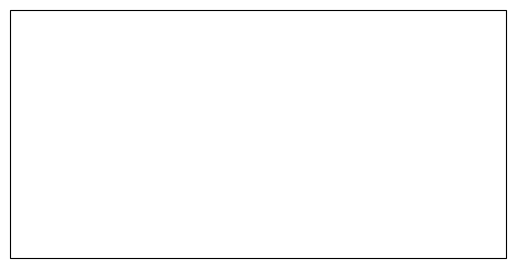

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.axes(projection=ccrs.PlateCarree())

That was a little underwhelming, but we can see that the Axes created is indeed one of those GeoAxes[Subplot] instances.

One of the most useful methods that this class adds on top of the standard matplotlib Axes class is the ``coastlines`` method. With no arguments, it will add the Natural Earth ``1:110,000,000`` scale coastline data to the map.

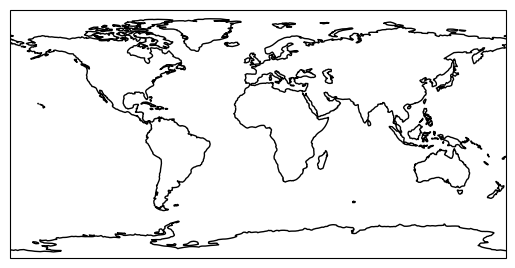

In [ ]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

We could just as equally created a matplotlib subplot with one of the many approaches that exist. For example, the ```plt.subplots``` function could be used:

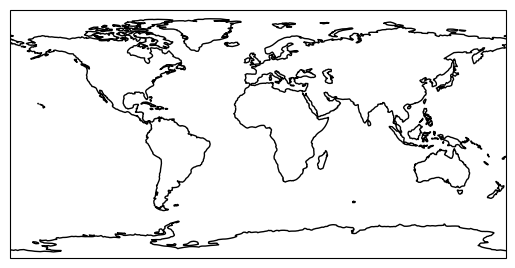

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()

Projection classes have options we can use to customize the map

In [ ]:
ccrs.PlateCarree?

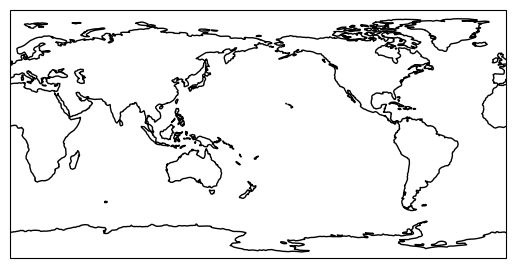

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.coastlines()

### Useful methods of a GeoAxes

The [cartopy.mpl.geoaxes.GeoAxes](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes) class adds a number of useful methods.

Let's take a look at:

 * [set_global](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.set_global) - zoom the map out as much as possible
 * [set_extent](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.set_extent) - zoom the map to the given bounding box


 * [gridlines](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.graticule) - add a graticule (and optionally labels) to the axes
 * [coastlines](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.coastlines) - add Natural Earth coastlines to the axes
 * [stock_img](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.stock_img) - add a low-resolution Natural Earth background image to the axes


 * [imshow](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.imshow.html#matplotlib.axes.Axes.imshow) - add an image (numpy array) to the axes
 * [add_geometries](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.add_geometries) - add a collection of geometries (Shapely) to the axes

### Some More Examples of Different Global Projections

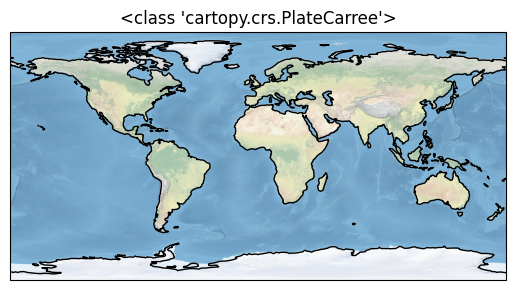

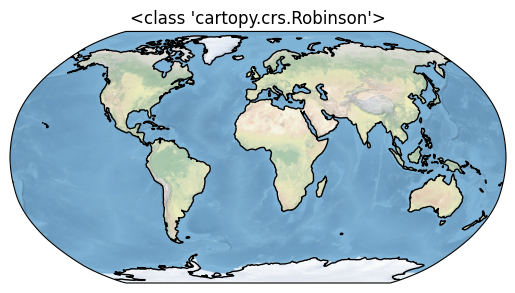

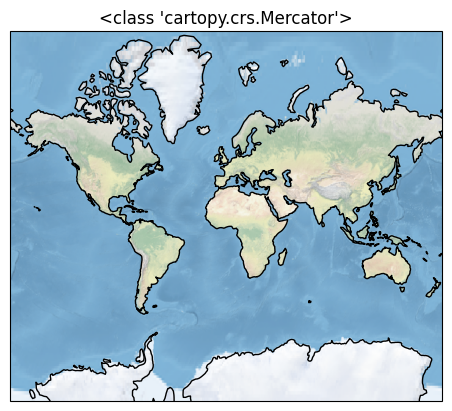

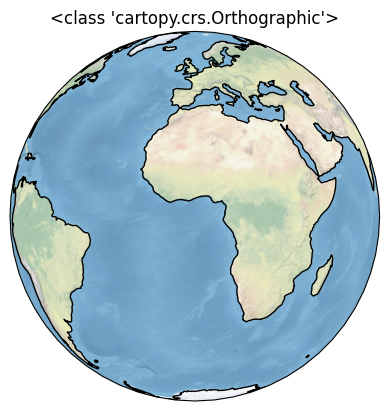

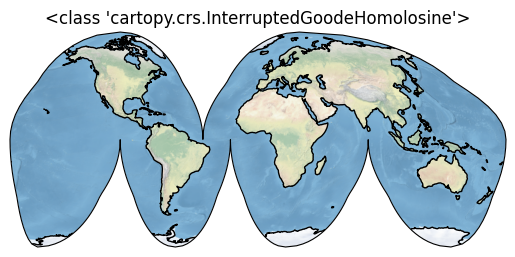

In [ ]:
projections = [ccrs.PlateCarree(),
               ccrs.Robinson(),
               ccrs.Mercator(),
               ccrs.Orthographic(),
               ccrs.InterruptedGoodeHomolosine()
              ]


for proj in projections:
    plt.figure()
    ax = plt.axes(projection=proj)
    ax.stock_img()
    ax.coastlines()
    ax.set_title(f'{type(proj)}')

### Regional Maps

To create a regional map, we use the `set_extent` method of GeoAxis to limit the size of the region.

In [ ]:
ax.set_extent?

Signature: ax.set_extent(extents, crs=None)
Docstring:
Set the extent (x0, x1, y0, y1) of the map in the given
coordinate system.

If no crs is given, the extents' coordinate system will be assumed
to be the Geodetic version of this axes' projection.

Parameters
----------
extents
    Tuple of floats representing the required extent (x0, x1, y0, y1).
File:      /srv/conda/envs/notebook/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py
Type:      method


/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


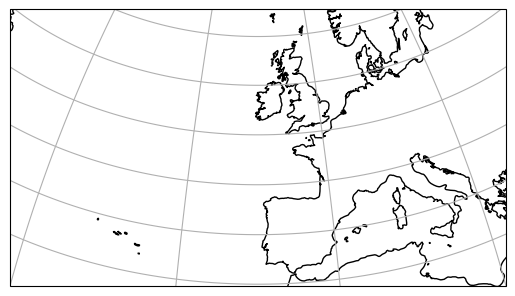

In [ ]:
central_lon, central_lat = -10, 45
extent = [-40, 20, 30, 60]
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)
ax.gridlines()
ax.coastlines(resolution='50m')


## Adding Features to the Map

To give our map more styles and details, we add `cartopy.feature` objects.
Many useful features are built in. These "default features" are at coarse (110m) resolution.

Name | Description
-----|------------
`cartopy.feature.BORDERS` | Country boundaries
`cartopy.feature.COASTLINE` | Coastline, including major islands
`cartopy.feature.LAKES` | Natural and artificial lakes
`cartopy.feature.LAND` | Land polygons, including major islands
`cartopy.feature.OCEAN` | Ocean polygons
`cartopy.feature.RIVERS` | Single-line drainages, including lake centerlines
`cartopy.feature.STATES` | (limited to the United States at this scale)

Below we illustrate these features in a customized map of North America.

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_rivers_lake_centerlines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


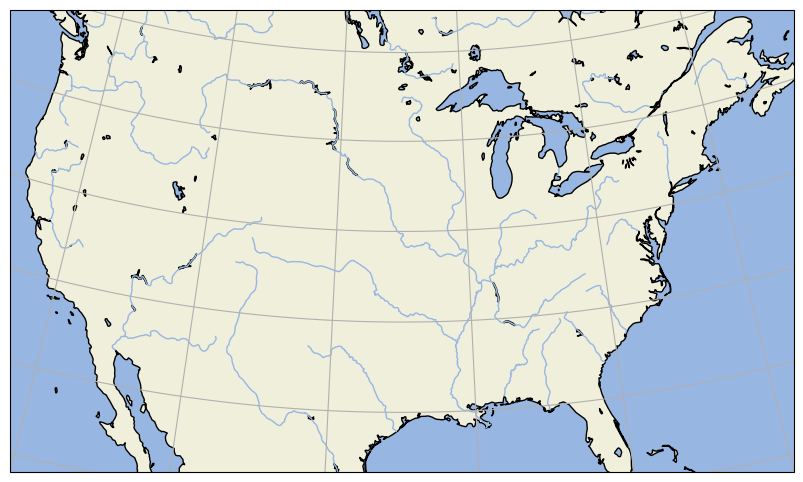

In [ ]:
import cartopy.feature as cfeature
import numpy as np

central_lat = 37.5
central_lon = -96
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.gridlines()

If we want higher-resolution features, Cartopy can automatically download and create them from the [Natural Earth Data](http://www.naturalearthdata.com/) database or the [GSHHS dataset](https://www.ngdc.noaa.gov/mgg/shorelines/gshhs.html) database.

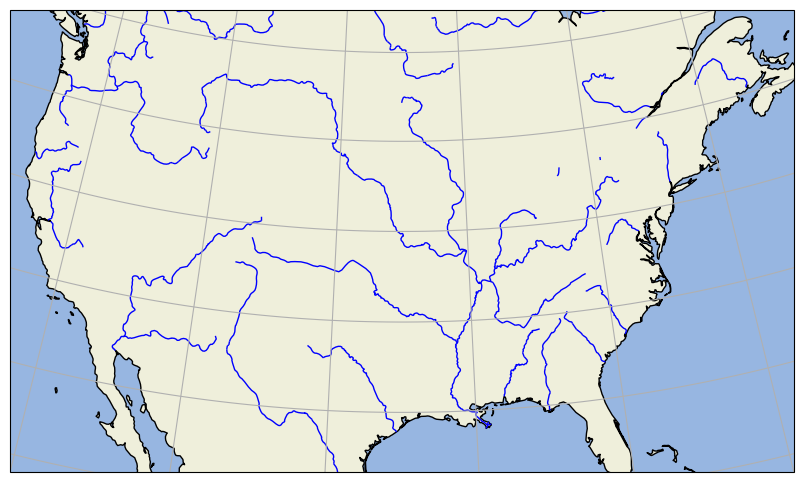

In [ ]:
rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '50m')

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')
ax.gridlines()

## Adding Data to the Map

Now that we know how to create a map, let's add our data to it! That's the whole point.

Because our map is a matplotlib axis, we can use all the familiar maptplotlib commands to make plots.
By default, the map extent will be adjusted to match the data. We can override this with the `.set_global` or `.set_extent` commands.

In [ ]:
# create some test data
new_york = dict(lon=-74.0060, lat=40.7128)
honolulu = dict(lon=-157.8583, lat=21.3069)
lons = [new_york['lon'], honolulu['lon']]
lats = [new_york['lat'], honolulu['lat']]

Key point: **the data also have to be transformed to the projection space**.
This is done via the `transform=` keyword in the plotting method. The argument is another `cartopy.crs` object.
If you don't specify a transform, Cartopy assume that the data is using the same projection as the underlying GeoAxis.

From the [Cartopy Documentation](https://scitools.org.uk/cartopy/docs/latest/tutorials/understanding_transform.html)

> The core concept is that the projection of your axes is independent of the coordinate system your data is defined in. The `projection` argument is used when creating plots and determines the projection of the resulting plot (i.e. what the plot looks like). The `transform` argument to plotting functions tells Cartopy what coordinate system your data are defined in.

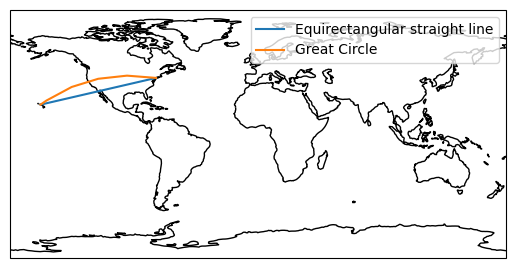

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.plot(lons, lats, label='Equirectangular straight line')
ax.plot(lons, lats, label='Great Circle', transform=ccrs.Geodetic())
ax.coastlines()
ax.legend()
ax.set_global()

### Plotting 2D (Raster) Data

The same principles apply to 2D data. Below we create some example data defined in regular lat / lon coordinates.

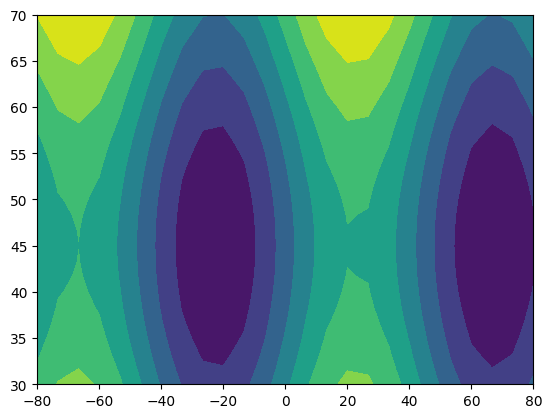

In [ ]:
import numpy as np
lon = np.linspace(-80, 80, 25)
lat = np.linspace(30, 70, 25)
lon2d, lat2d = np.meshgrid(lon, lat)
data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)
plt.contourf(lon2d, lat2d, data)

Now we create a `PlateCarree` projection and plot the data on it without any `transform` keyword.
This happens to work because `PlateCarree` is the simplest projection of lat / lon data.

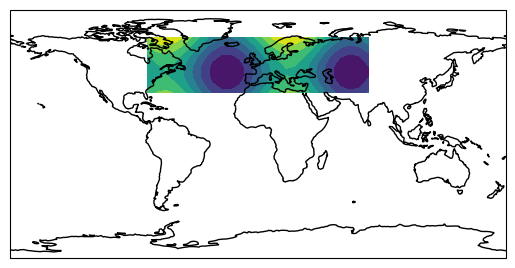

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data)

However, if we try the same thing with a different projection, we get the wrong result.

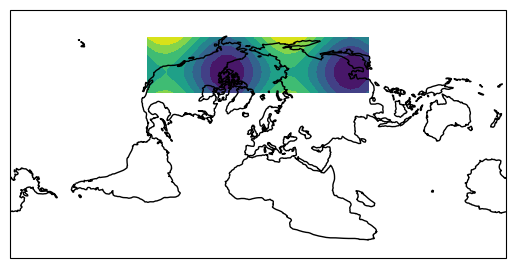

In [ ]:
projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data)

To fix this, we need to pass the correct transform argument to `contourf`:

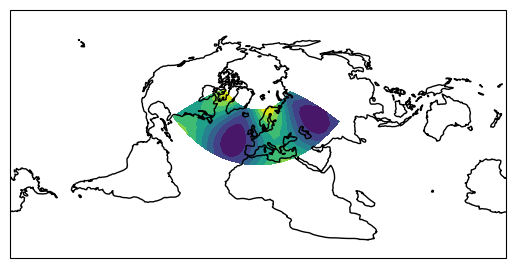

In [ ]:
projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data, transform=ccrs.PlateCarree())

## Doing More

Browse the [Cartopy Gallery](https://scitools.org.uk/cartopy/docs/latest/gallery/index.html) to learn about all the different types of data and plotting methods available!